# **PART A: Predicting Signal Quality Using Machine Learning**

## **Domain: Electronics and Telecommunication**

### **Context**
A communications equipment manufacturing company has a product responsible for emitting informative signals. The company wants to build a machine learning model that can predict the equipment’s signal quality based on various measurable parameters.

### **Data Description**
The dataset contains information on multiple signal tests performed, including:
- **Parameters**: Various measurable signal attributes.
- **Signal_Quality**: The final signal strength or quality.

### **Project Objective**
To develop a classification model that can accurately predict signal quality based on the provided signal parameters.

---


In [3]:
!!pip install tensorflow-gpu
!!pip install scikeras
!!pip install --no-cache-dir --force-reinstall scikit-learn==1.5.2


['Collecting scikit-learn==1.5.2',
 '  Downloading scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)',
 'Collecting numpy>=1.19.5 (from scikit-learn==1.5.2)',
 '  Downloading numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/62.0 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b62.0/62.0 kB\x1b \x1b5.1 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting scipy>=1.6.0 (from scikit-learn==1.5.2)',
 '  Downloading scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/62.0 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b62.0/62.0 kB\x1b \x1b44.6 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting joblib>=1.2.0 (f

### Importing Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras import optimizers, losses
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import StandardScaler

%matplotlib inline
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
# Preventing scientific notation.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/Python Course/neural network'

In [5]:
#  store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

#### Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.


In [6]:
# read dataset
df = pd.read_csv(f'{path}/NN Project Data - Signal.csv')
signal_df=df.copy(deep=True)


In [7]:
# Showing first 5 records
signal_df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0        7.400        0.700        0.000        1.900        0.076   
1        7.800        0.880        0.000        2.600        0.098   
2        7.800        0.760        0.040        2.300        0.092   
3       11.200        0.280        0.560        1.900        0.075   
4        7.400        0.700        0.000        1.900        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0       11.000       34.000        0.998        3.510         0.560   
1       25.000       67.000        0.997        3.200         0.680   
2       15.000       54.000        0.997        3.260         0.650   
3       17.000       60.000        0.998        3.160         0.580   
4       11.000       34.000        0.998        3.510         0.560   

   Parameter 11  Signal_Strength  
0         9.400                5  
1         9.800                5  
2         9.800                5  
3         9.800                6  
4         9.400                5

In [8]:
# Checking Data
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the fileds are of float type except **Signal_Strength**

In [9]:
#Shape of df
signal_df.shape

(1599, 12)

There is around 1599 rows and 12 columns

#### Part A - Q1 B - Check for missing values and print percentage for each attribute.


In [10]:
# Check for missing values
signal_df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [11]:
# Check for missing values percentage
signal_df.isnull().sum()*100/len(signal_df)

Parameter 1       0.000
Parameter 2       0.000
Parameter 3       0.000
Parameter 4       0.000
Parameter 5       0.000
Parameter 6       0.000
Parameter 7       0.000
Parameter 8       0.000
Parameter 9       0.000
Parameter 10      0.000
Parameter 11      0.000
Signal_Strength   0.000
dtype: float64

No missing or null values found

#### Check Unique records across all columns

In [12]:
# Chevk unique values in each columns
columns=signal_df.columns
for col in columns:
  print(col)
  print(signal_df[col].nunique())



Parameter 1
96
Parameter 2
143
Parameter 3
80
Parameter 4
91
Parameter 5
153
Parameter 6
60
Parameter 7
144
Parameter 8
436
Parameter 9
89
Parameter 10
96
Parameter 11
65
Signal_Strength
6


In [13]:
#  Show unique values in target column
signal_df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

There are around 6 unique values in traget variable 3,4,5,6,7,8

#### Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.


In [14]:
# Show duplicate rows in the dataframe
signal_df[signal_df.duplicated()]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4           7.400        0.700        0.000        1.900        0.076   
11          7.500        0.500        0.360        6.100        0.071   
27          7.900        0.430        0.210        1.600        0.106   
40          7.300        0.450        0.360        5.900        0.074   
65          7.200        0.725        0.050        4.650        0.086   
...           ...          ...          ...          ...          ...   
1563        7.200        0.695        0.130        2.000        0.076   
1564        7.200        0.695        0.130        2.000        0.076   
1567        7.200        0.695        0.130        2.000        0.076   
1581        6.200        0.560        0.090        1.700        0.053   
1596        6.300        0.510        0.130        2.300        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4          11.000       34.000        0.998        3.510         0.560   
11         17.000      102.000        0.998        3.350         0.800   
27         10.000       37.000        0.997        3.170         0.910   
40         12.000       87.000        0.998        3.330         0.830   
65          4.000       11.000        0.996        3.410         0.390   
...           ...          ...          ...          ...           ...   
1563       12.000       20.000        0.995        3.290         0.540   
1564       12.000       20.000        0.995        3.290         0.540   
1567       12.000       20.000        0.995        3.290         0.540   
1581       24.000       32.000        0.994        3.540         0.600   
1596       29.000       40.000        0.996        3.420         0.750   

      Parameter 11  Signal_Strength  
4            9.400                5  
11          10.500                5  
27           9.500                5  
40          10.500                5  
65          10.900                5  
...            ...              ...  
1563        10.100                5  
1564        10.100                5  
1567        10.100                5  
1581        11.300                5  
1596        11.000                6  

[240 rows x 12 columns]

In [15]:
# dropping duplicate values .We will keep the first one and drop the redudant
signal_df.drop_duplicates(keep='first',inplace=True)
signal_df[signal_df.duplicated()]

Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []

In [16]:
# After Dropping duplicate values
signal_df.shape

(1359, 12)

### Observations:
After removing duplicates we have around 1359 records

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = signal_df.quantile(0.25)
Q3 = signal_df.quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each column
outliers_count = ((signal_df < lower_bound) | (signal_df > upper_bound)).sum()

# Display outlier counts as a DataFrame
outliers_df = pd.DataFrame(outliers_count, columns=['Outliers'])
print(outliers_df)

                 Outliers
Parameter 1            41
Parameter 2            19
Parameter 3             1
Parameter 4           126
Parameter 5            87
Parameter 6            26
Parameter 7            45
Parameter 8            35
Parameter 9            28
Parameter 10           55
Parameter 11           12
Signal_Strength        27


###Observations:
- Parameter 4 has highest outliers i.e 126 followed by parameter 5 and parameter 10.
- We donot know id these are real values or some outliers so we cannot treat them without domain knowledge

### Utils

In [18]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [19]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


    return plt

In [20]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [21]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [22]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [23]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [24]:
def fit(model, X_train, y_train, X_test, y_test, NoOfEpochs, batch_size, verbose=1):
    """
    Trains the neural network model and evaluates its performance.

    Parameters:
    - model: Keras model to be trained.
    - X_train: Training features (numpy array or DataFrame).
    - y_train: Training labels (numpy array or DataFrame).
    - X_test: Testing features (numpy array or DataFrame).
    - y_test: Testing labels (numpy array or DataFrame).
    - NoOfEpochs: Number of training epochs (int).
    - batch_size: Batch size for training (int).
    - verbose: Verbosity mode (int, default: 1).

    Returns:
    - history: Training history object containing loss and accuracy metrics.
    - test_accuracy: Final test accuracy after evaluation.
    """

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=NoOfEpochs, batch_size=batch_size, verbose=verbose)

    # Evaluate the model on test data
    test_accuracy = model.evaluate(X_test, y_test, verbose=1)

    # Store the test accuracy inside the model instance
    model.test_accuracy = test_accuracy


    return history


In [25]:
def plot_model_accuracy(history, model):
    """
    Plots the accuracy and loss trends over epochs for a trained neural network.

    Parameters:
    - history: Keras History object containing training metrics.
    - model: Trained Keras model with a stored test accuracy.

    Displays:
    - Subplot 1: Training & Validation Accuracy vs. Epochs
    - Subplot 2: Training & Validation Loss vs. Epochs
    """

    h1 = history.history  # Extract training history

    plt.figure(figsize=(15,6))

    # Plot Accuracy
    plt.subplot(1,2,1)
    sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label="Val_accuracy", color="blue")
    sns.lineplot(y=h1['accuracy'], x=range(len(h1['accuracy'])), label="Accuracy", color="green")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Epochs Vs Accuracy (Acc = {model.test_accuracy})")

    # Plot Loss
    plt.subplot(1,2,2)
    sns.lineplot(y=h1['val_loss'], x=range(len(h1['val_loss'])), label="Val_Loss", color="red")
    sns.lineplot(y=h1['loss'], x=range(len(h1['loss'])), label="Loss", color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Epochs Vs Loss (Acc = {model.test_accuracy})")

    plt.show()


In [26]:
def build_sequential_model(model, inputDimensions, noOfClasses, layerRepeatCount, layerNeuronCount, dropout_rate=0.0, optimizer_type='sgd'):
    """
    Builds a sequential multi-layer neural network model.

    Parameters:
    - model: Keras Sequential model instance to which layers will be added.
    - inputDimensions: Number of input features (int).
    - noOfClasses: Number of output classes (int).
    - layerRepeatCount: Number of hidden layers (int).
    - layerNeuronCount: Number of neurons in each hidden layer (int).
    - dropout_rate: Dropout rate (float, default: 0.0). Set to > 0 to add dropout layers.
    - optimizer_type: Optimizer to use ('adam' or 'sgd', default: 'sgd').

    Returns:
    - Compiled Keras model.
    """

    # Input layer
    model.add(Dense(layerNeuronCount, input_dim=inputDimensions, activation='relu', kernel_initializer='he_uniform'))

    if dropout_rate > 0:  # Add dropout if specified
        model.add(Dropout(dropout_rate))
    # Hidden layers
    for _ in range(1, layerRepeatCount):
        model.add(Dense(layerNeuronCount, activation='relu', kernel_initializer='he_uniform'))
        if dropout_rate > 0:  # Add dropout if specified
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(noOfClasses, activation='softmax'))

    # Compile model using the specified optimizer
    compile_model(model, optimizer_type=optimizer_type)

    # Print model summary
    print(model.summary())

    return model

In [27]:
def compile_model(model, optimizer_type='adam', learning_rate=0.001, momentum=0.66, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
    """
    Compiles the model with the specified optimizer.

    Parameters:
    - model: Keras model to compile.
    - optimizer_type: 'adam' or 'sgd' (default: 'adam').
    - learning_rate: Learning rate for the optimizer (default: 0.01).
    - momentum: Momentum for SGD (default: 0.66).
    - beta_1: Exponential decay rate for Adam’s first moment estimate (default: 0.9).
    - beta_2: Exponential decay rate for Adam’s second moment estimate (default: 0.999).
    - epsilon: Small value to prevent division by zero in Adam (default: 1e-07).

    Returns:
    - Compiled model.
    """

    if optimizer_type.lower() == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    elif optimizer_type.lower() == 'sgd':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Unsupported optimizer. Choose 'adam' or 'sgd'.")

    model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

In [70]:
def create_model_v4(lr=0.01, units_1=16, units_2=6, activation='relu', dropout_rate=0.2, optimizer='adam', num_layers=2):
    model = Sequential()
    model.add(Dense(units_1, activation=activation, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))

    for _ in range(num_layers - 1):
        model.add(Dense(units_2, activation=activation, kernel_initializer='he_uniform'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(6, activation='softmax'))

    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    elif optimizer == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
    elif optimizer == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


#### Part A - Q1 D - Visualise distribution of the target variable.


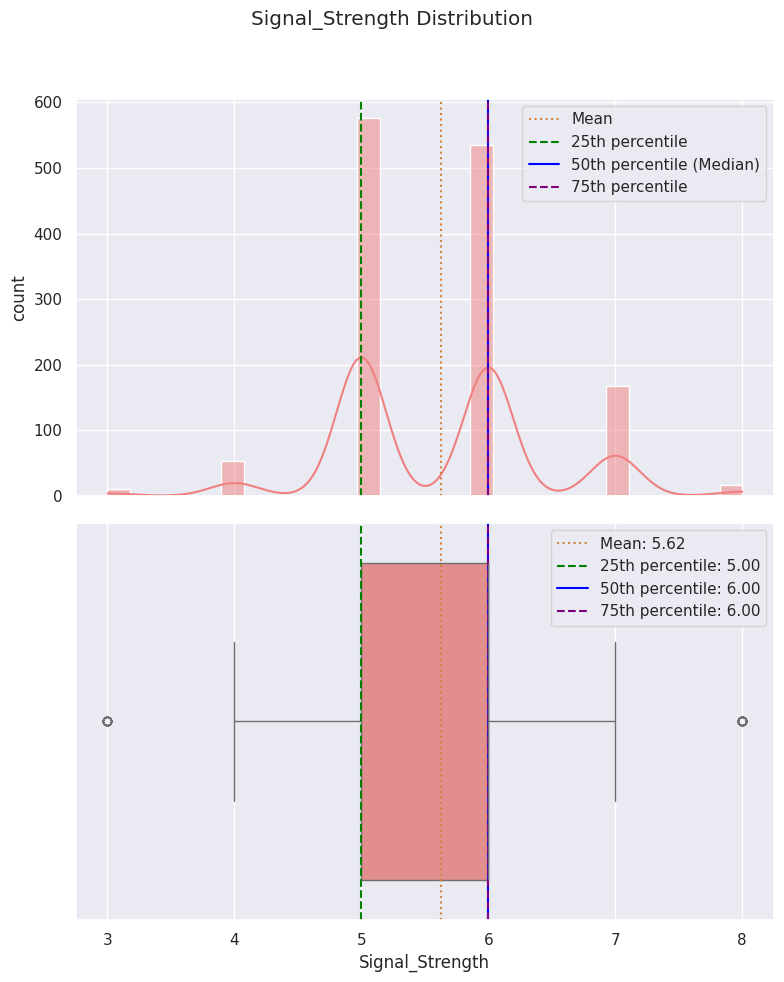

In [29]:
# Check Distribution of traget variable using box and hostogram
plot_histogram_and_boxplot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution')

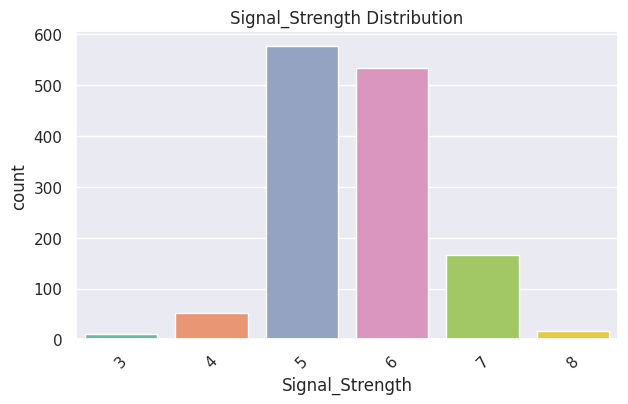

In [30]:
# Show count plot on signal strength
draw_count_plot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution');

In [31]:
# No of values on each signals strength
signal_df['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

### Observations:
- The DataFrame has 11 columns with 10 of them having float data type while 1 with the integer data type.
- No Null values detected in any column
- After removing duplicates the dataset has 1359 observations
- The target variable 'Signal_Strength' having values most concentrated at value 5 (total count 577) followed by 6 (total count 535) follwed by 7 (167)
-  3 has Lowesr concentrated around 10 only

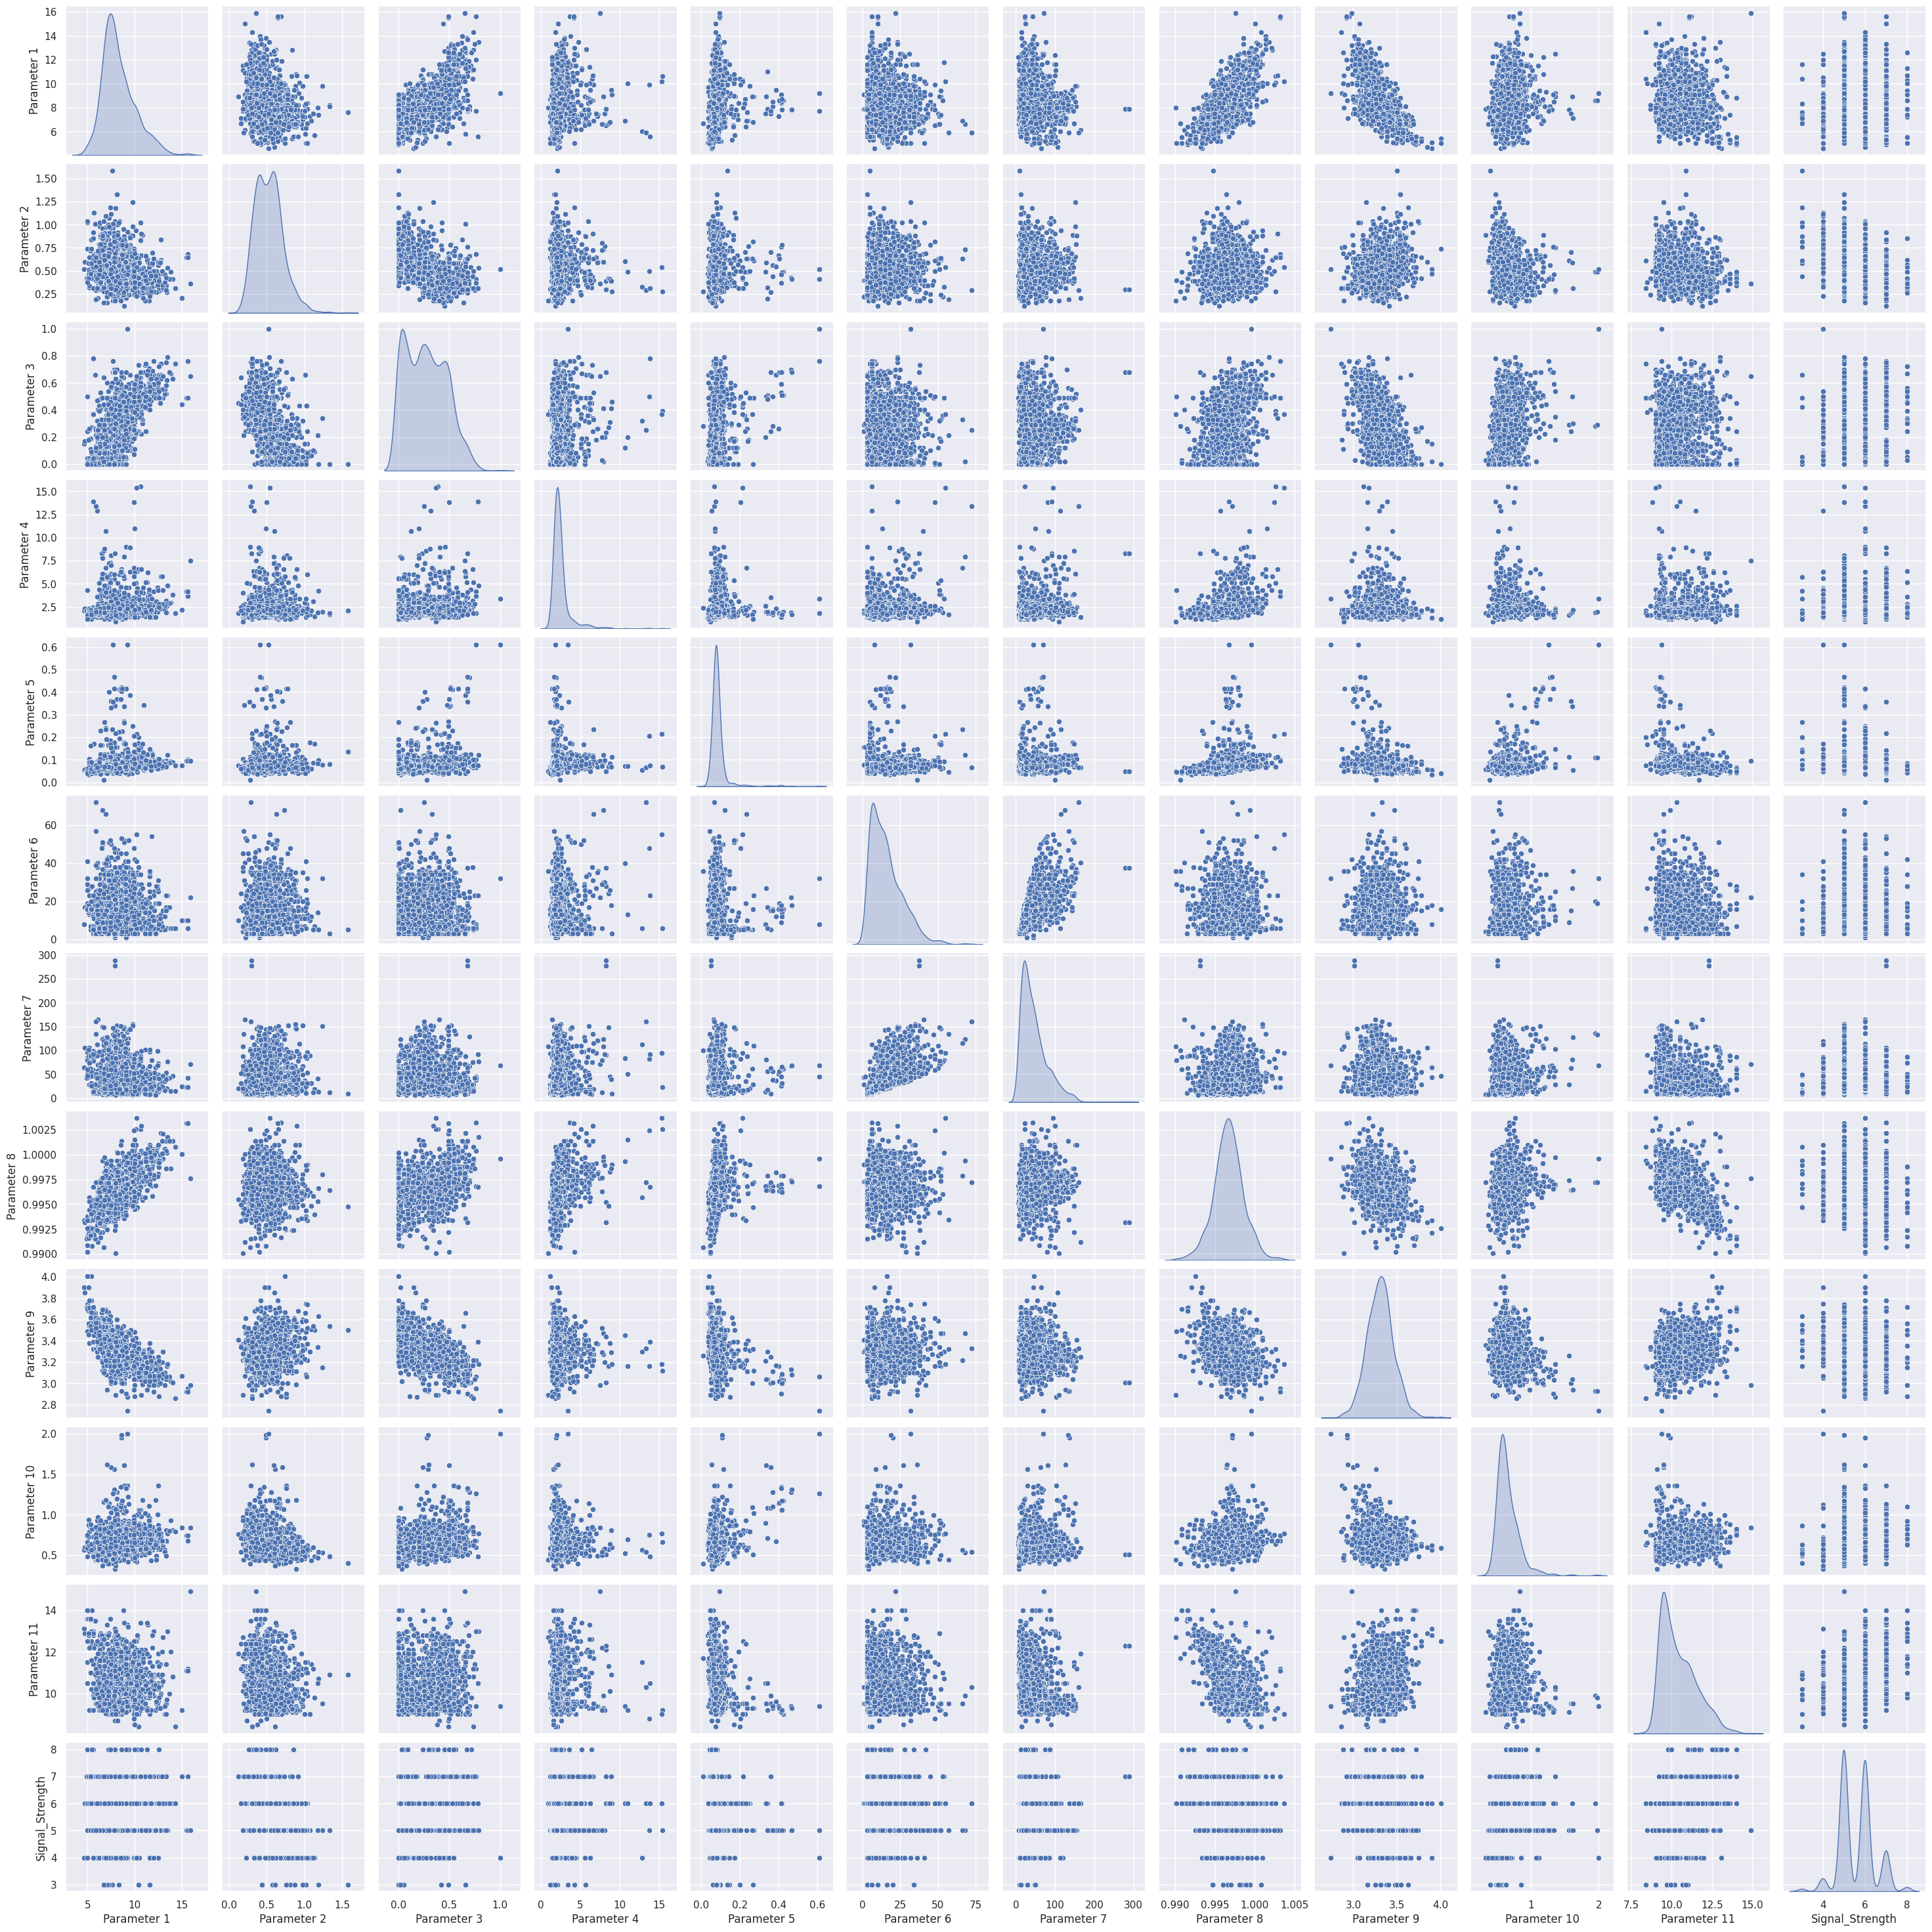

In [32]:
#plt.figure(figsize = (50,50))
sns.pairplot(signal_df,diag_kind='kde')
plt.show()

### Observations:
There seems to be muticolinearity
- Parameter 6 and Parameter 7 are highly correlated with each other.
- Parameter 1 is positively correlated to Parameter 3
- Parameter 8 and negatively correlated to Parameter 2 and 9
- Parameter 4 is has very low correlation with other Parameters.

### Insights from the initial data analysis (at least 2)
- The DataFrame has 11 columns with 10 of them having float data type while 1 with the integer data type.
- No Null values detected in any column
- After removing duplicates the dataset has 1359 observations
- The target variable 'Signal_Strength' having values most concentrated at value 5 (total count 577) followed by 6 (total count 535) follwed by 7 (167)
-  3 has Lowesr concentrated around 10 only
- Parameter 6 and Parameter 7 are highly correlated with each other.
- Parameter 4 has highest outliers i.e 126 followed by parameter 5 and parameter 10.



#### Part A - Q2 A - Split the data into X & Y.


In [33]:
# Define mapping for ordinal encoding
signal_mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
# Apply mapping to the target column
signal_df["Signal_Strength"] = signal_df["Signal_Strength"].map(signal_mapping)

In [34]:

# Dropping traget columns and then assigning to X and Y
X = signal_df.drop(['Signal_Strength'],axis=1)
y = signal_df[['Signal_Strength']]

In [35]:
yc = to_categorical(y, num_classes=6)

#### Part A - Q2 B - Split the data into train & test with 70:30 proportion.


In [36]:
# Splitting the dataset into the Training and Testing set. Test set of 30% and training set if 70%
X_train, X_test, y_train, y_test = train_test_split(X,yc, test_size = 0.30, random_state = 0,stratify = y)

In [37]:
# Printing the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951, 6)
(408, 6)


In [38]:
# Divide test and validation set to make sure test data is unseen
Xv_train, X_val, yv_train, y_val = train_test_split(X_train,y_train, test_size = 0.20, random_state = 0,stratify = y_train)

In [39]:
#Validation Set
print(Xv_train.shape)
print(X_val.shape)
print(yv_train.shape)
print(y_val.shape)

(760, 11)
(191, 11)
(760, 6)
(191, 6)


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xv_train)  # Fit on training data
X_test_scaled = scaler.transform(X_val)  # Transform using same scaler
X_train_scaled_actual = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled_actual = scaler.transform(X_test)  # Transform using same scaler

In [41]:
no_of_classes=len(y_train[0])
print(f"No of classes {no_of_classes}")

No of classes 6


## **Model Building**

Buidling Model with one layer and relu activation for hidden layers softmax at the end
### Basic Model

In [42]:
histories = []  # List to store history objects

noofneurons = [6, 7, 10,11]
for i in noofneurons:
    backend.clear_session()
    random.seed(32)
    tf.random.set_seed(32)
    print(f"Creating model for Single Layer with Neuron Count: {i}")

    model = Sequential()
    model = build_sequential_model(model, X_train_scaled.shape[1], no_of_classes, 1, layerNeuronCount=i)

    history = fit(model, X_train_scaled, yv_train, X_test_scaled, y_val, 50, 32, 2)

    histories.append((history, model,i))  # Store (history, model) tuple

Creating model for Single Layer with Neuron Count: 6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 50ms/step - accuracy: 0.2829 - loss: 2.1797 - val_accuracy: 0.2618 - val_loss: 2.0043
Epoch 2/50
24/24 - 0s - 12ms/step - accuracy: 0.3000 - loss: 2.1183 - val_accuracy: 0.2775 - val_loss: 1.9515
Epoch 3/50
24/24 - 0s - 7ms/step - accuracy: 0.3171 - loss: 2.0608 - val_accuracy: 0.2827 - val_loss: 1.9030
Epoch 4/50
24/24 - 0s - 5ms/step - accuracy: 0.3303 - loss: 2.0075 - val_accuracy: 0.3194 - val_loss: 1.8585
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.3553 - loss: 1.9581 - val_accuracy: 0.3455 - val_loss: 1.8176
Epoch 6/50
24/24 - 0s - 5ms/step - accuracy: 0.3816 - loss: 1.9121 - val_accuracy: 0.3403 - val_loss: 1.7800
Epoch 7/50
24/24 - 0s - 7ms/step - accuracy: 0.4026 - loss: 1.8695 - val_accuracy: 0.3665 - val_loss: 1.7453
Epoch 8/50
24/24 - 0s - 12ms/step - accuracy: 0.4184 - loss: 1.8297 - val_accuracy: 0.3927 - val_loss: 1.7132
Epoch 9/50
24/24 - 0s - 13ms/step - accuracy: 0.4276 - loss: 1.7924 - val_accuracy: 0.3979 - val_loss: 1.6834
Epoch 10/5

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132 (528.00 B)

 Trainable params: 132 (528.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 38ms/step - accuracy: 0.2263 - loss: 2.3249 - val_accuracy: 0.2827 - val_loss: 2.1094
Epoch 2/50
24/24 - 0s - 18ms/step - accuracy: 0.2342 - loss: 2.2553 - val_accuracy: 0.2932 - val_loss: 2.0524
Epoch 3/50
24/24 - 0s - 6ms/step - accuracy: 0.2434 - loss: 2.1898 - val_accuracy: 0.3141 - val_loss: 1.9991
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.2579 - loss: 2.1285 - val_accuracy: 0.3351 - val_loss: 1.9491
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.2724 - loss: 2.0712 - val_accuracy: 0.3455 - val_loss: 1.9025
Epoch 6/50
24/24 - 0s - 7ms/step - accuracy: 0.2816 - loss: 2.0176 - val_accuracy: 0.3665 - val_loss: 1.8589
Epoch 7/50
24/24 - 0s - 11ms/step - accuracy: 0.2947 - loss: 1.9673 - val_accuracy: 0.3770 - val_loss: 1.8180
Epoch 8/50
24/24 - 0s - 5ms/step - accuracy: 0.3105 - loss: 1.9203 - val_accuracy: 0.3979 - val_loss: 1.7797
Epoch 9/50
24/24 - 0s - 7ms/step - accuracy: 0.3171 - loss: 1.8763 - val_accuracy: 0.4031 - val_loss: 1.7439
Epoch 10/50

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186 (744.00 B)

 Trainable params: 186 (744.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 36ms/step - accuracy: 0.3039 - loss: 1.9454 - val_accuracy: 0.2042 - val_loss: 2.1287
Epoch 2/50
24/24 - 0s - 6ms/step - accuracy: 0.3158 - loss: 1.9012 - val_accuracy: 0.2147 - val_loss: 2.0839
Epoch 3/50
24/24 - 0s - 5ms/step - accuracy: 0.3276 - loss: 1.8598 - val_accuracy: 0.2304 - val_loss: 2.0423
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.3368 - loss: 1.8216 - val_accuracy: 0.2461 - val_loss: 2.0036
Epoch 5/50
24/24 - 0s - 5ms/step - accuracy: 0.3434 - loss: 1.7860 - val_accuracy: 0.2618 - val_loss: 1.9674
Epoch 6/50
24/24 - 0s - 5ms/step - accuracy: 0.3592 - loss: 1.7530 - val_accuracy: 0.2670 - val_loss: 1.9337
Epoch 7/50
24/24 - 0s - 7ms/step - accuracy: 0.3724 - loss: 1.7224 - val_accuracy: 0.2723 - val_loss: 1.9022
Epoch 8/50
24/24 - 0s - 12ms/step - accuracy: 0.3855 - loss: 1.6938 - val_accuracy: 0.2880 - val_loss: 1.8728
Epoch 9/50
24/24 - 0s - 5ms/step - accuracy: 0.3855 - loss: 1.6671 - val_accuracy: 0.2984 - val_loss: 1.8453
Epoch 10/50


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204 (816.00 B)

 Trainable params: 204 (816.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 38ms/step - accuracy: 0.3513 - loss: 1.6571 - val_accuracy: 0.3822 - val_loss: 1.5593
Epoch 2/50
24/24 - 0s - 16ms/step - accuracy: 0.3697 - loss: 1.6159 - val_accuracy: 0.3927 - val_loss: 1.5252
Epoch 3/50
24/24 - 0s - 6ms/step - accuracy: 0.3882 - loss: 1.5779 - val_accuracy: 0.4136 - val_loss: 1.4941
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.4013 - loss: 1.5430 - val_accuracy: 0.4188 - val_loss: 1.4658
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.4158 - loss: 1.5110 - val_accuracy: 0.4346 - val_loss: 1.4399
Epoch 6/50
24/24 - 0s - 6ms/step - accuracy: 0.4197 - loss: 1.4817 - val_accuracy: 0.4607 - val_loss: 1.4163
Epoch 7/50
24/24 - 0s - 7ms/step - accuracy: 0.4237 - loss: 1.4547 - val_accuracy: 0.4764 - val_loss: 1.3948
Epoch 8/50
24/24 - 0s - 5ms/step - accuracy: 0.4329 - loss: 1.4300 - val_accuracy: 0.4817 - val_loss: 1.3752
Epoch 9/50
24/24 - 0s - 5ms/step - accuracy: 0.4434 - loss: 1.4073 - val_accuracy: 0.4764 - val_loss: 1.3573
Epoch 10/50


ploting for single layer with no of neuron 6


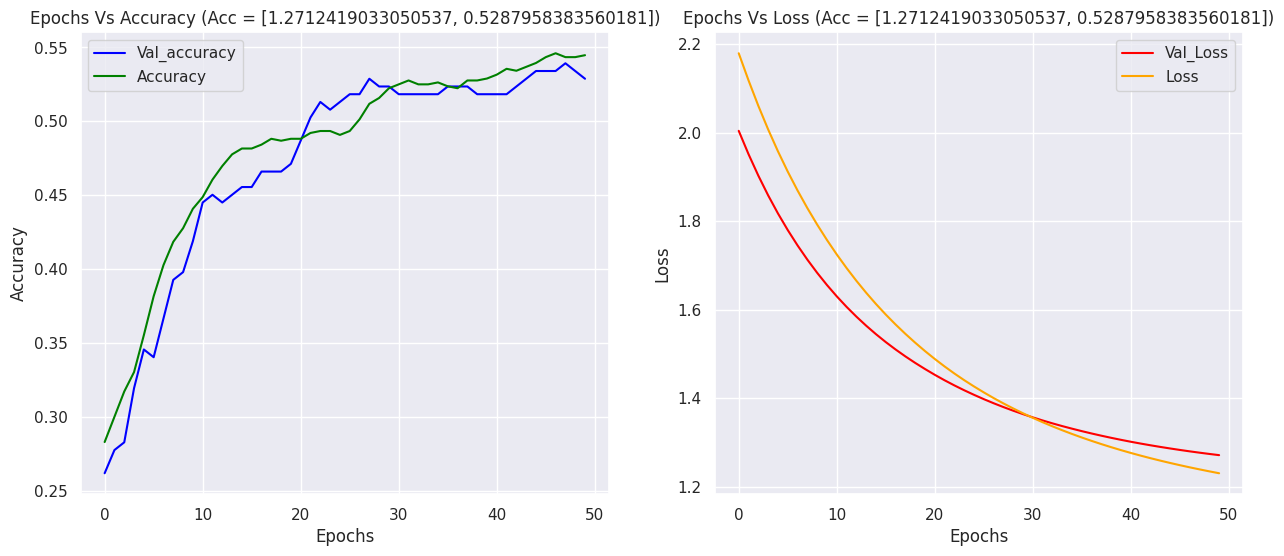

ploting for single layer with no of neuron 7


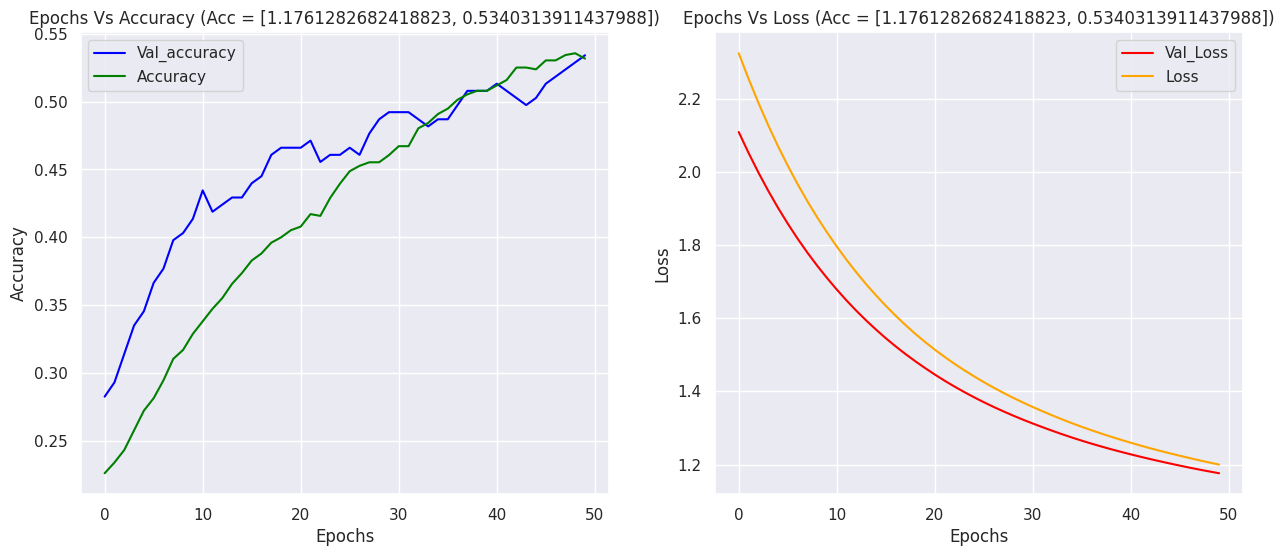

ploting for single layer with no of neuron 10


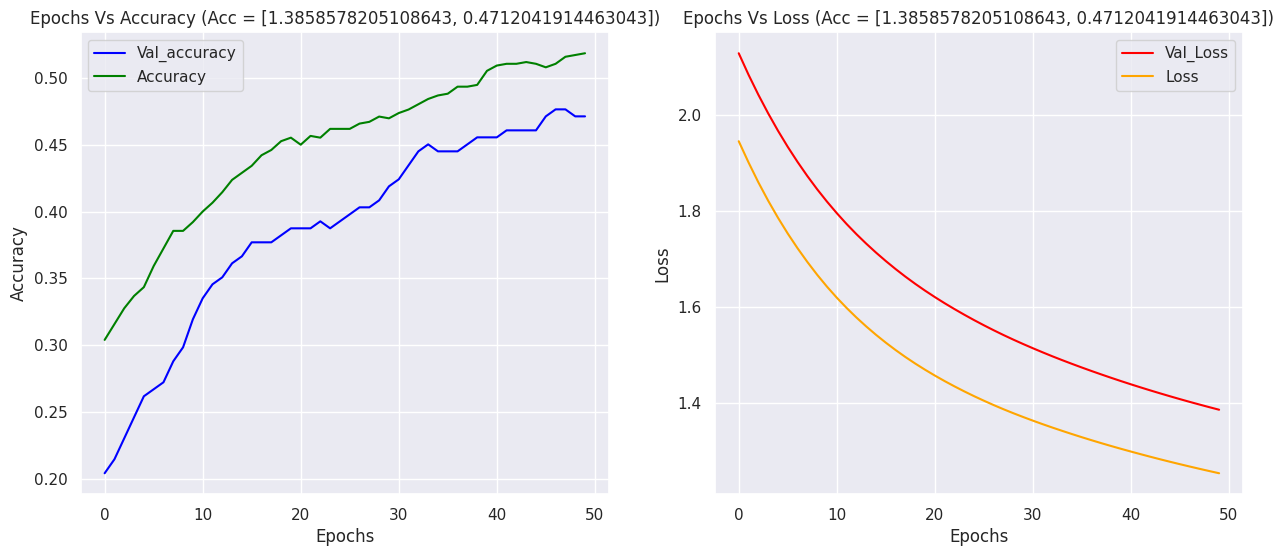

ploting for single layer with no of neuron 11


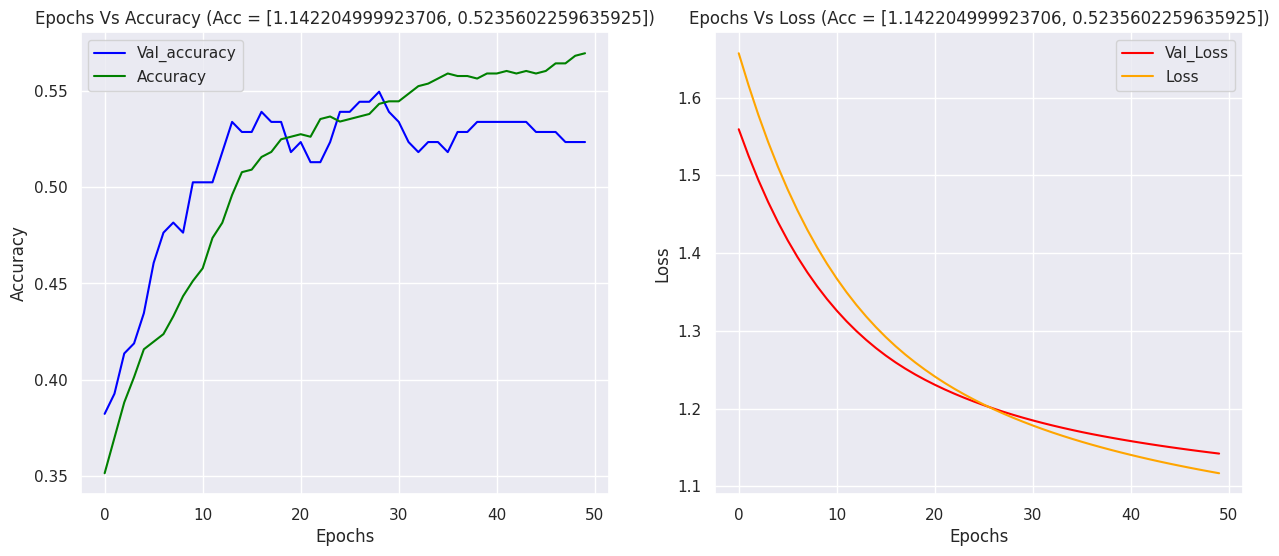

In [43]:
# Now plot all models at once
for history, model, neurons in histories:
    print(f"ploting for single layer with no of neuron {neurons}")
    plot_model_accuracy(history, model)

### Observations:
- From the above plot we can see acuracy is 53% with 7 neurons and lowest (47%) at 10 neurons .
- Better convergance with nof of neurons 7 and 6 . Accuracy of 52%-53%
- This is a single layer neural network.We will check adding more layers and see if there will be any change
- SOme level of Connvergence is seen .

Model After Adding some More layers

In [44]:
histories = []  # List to store history objects

layerNeuronCount = [2,4,6,8]
for i in layerNeuronCount:
    backend.clear_session()
    random.seed(32)
    tf.random.set_seed(32)
    print(f"Creating model for Single Layer with Neuron Count: {i}")

    model = Sequential()
    model = build_sequential_model(model, X_train_scaled.shape[1], no_of_classes,layerRepeatCount=i,layerNeuronCount=10)

    history = fit(model, X_train_scaled, yv_train, X_test_scaled, y_val, 50, 32, 2)

    histories.append((history, model,i))  # Store (history, model) tuple

Creating model for Single Layer with Neuron Count: 2


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296 (1.16 KB)

 Trainable params: 296 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 64ms/step - accuracy: 0.0592 - loss: 2.3935 - val_accuracy: 0.0628 - val_loss: 2.2370
Epoch 2/50
24/24 - 0s - 11ms/step - accuracy: 0.0658 - loss: 2.2562 - val_accuracy: 0.0838 - val_loss: 2.1300
Epoch 3/50
24/24 - 0s - 6ms/step - accuracy: 0.0855 - loss: 2.1447 - val_accuracy: 0.1099 - val_loss: 2.0451
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.1039 - loss: 2.0540 - val_accuracy: 0.1361 - val_loss: 1.9755
Epoch 5/50
24/24 - 0s - 12ms/step - accuracy: 0.1289 - loss: 1.9788 - val_accuracy: 0.1571 - val_loss: 1.9171
Epoch 6/50
24/24 - 0s - 5ms/step - accuracy: 0.1553 - loss: 1.9157 - val_accuracy: 0.1885 - val_loss: 1.8671
Epoch 7/50
24/24 - 0s - 6ms/step - accuracy: 0.1868 - loss: 1.8618 - val_accuracy: 0.2042 - val_loss: 1.8236
Epoch 8/50
24/24 - 0s - 6ms/step - accuracy: 0.2132 - loss: 1.8148 - val_accuracy: 0.2304 - val_loss: 1.7851
Epoch 9/50
24/24 - 0s - 6ms/step - accuracy: 0.2526 - loss: 1.7736 - val_accuracy: 0.2304 - val_loss: 1.7512
Epoch 10/50

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 516 (2.02 KB)

 Trainable params: 516 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 55ms/step - accuracy: 0.3592 - loss: 2.0865 - val_accuracy: 0.3508 - val_loss: 2.0617
Epoch 2/50
24/24 - 0s - 9ms/step - accuracy: 0.3553 - loss: 1.9392 - val_accuracy: 0.3455 - val_loss: 1.9400
Epoch 3/50
24/24 - 0s - 11ms/step - accuracy: 0.3605 - loss: 1.8438 - val_accuracy: 0.3508 - val_loss: 1.8572
Epoch 4/50
24/24 - 0s - 13ms/step - accuracy: 0.3724 - loss: 1.7757 - val_accuracy: 0.3508 - val_loss: 1.7949
Epoch 5/50
24/24 - 0s - 12ms/step - accuracy: 0.3842 - loss: 1.7227 - val_accuracy: 0.3508 - val_loss: 1.7454
Epoch 6/50
24/24 - 0s - 12ms/step - accuracy: 0.3934 - loss: 1.6791 - val_accuracy: 0.3560 - val_loss: 1.7038
Epoch 7/50
24/24 - 0s - 12ms/step - accuracy: 0.4079 - loss: 1.6416 - val_accuracy: 0.3665 - val_loss: 1.6678
Epoch 8/50
24/24 - 0s - 12ms/step - accuracy: 0.4211 - loss: 1.6085 - val_accuracy: 0.3770 - val_loss: 1.6360
Epoch 9/50
24/24 - 0s - 14ms/step - accuracy: 0.4368 - loss: 1.5786 - val_accuracy: 0.3927 - val_loss: 1.6067
Epoch 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 736 (2.88 KB)

 Trainable params: 736 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 64ms/step - accuracy: 0.4250 - loss: 2.3838 - val_accuracy: 0.4188 - val_loss: 1.8588
Epoch 2/50
24/24 - 0s - 6ms/step - accuracy: 0.4211 - loss: 1.7860 - val_accuracy: 0.4136 - val_loss: 1.6628
Epoch 3/50
24/24 - 0s - 6ms/step - accuracy: 0.4145 - loss: 1.6399 - val_accuracy: 0.4136 - val_loss: 1.5780
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.4197 - loss: 1.5612 - val_accuracy: 0.4188 - val_loss: 1.5200
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.4224 - loss: 1.5043 - val_accuracy: 0.4241 - val_loss: 1.4751
Epoch 6/50
24/24 - 0s - 15ms/step - accuracy: 0.4276 - loss: 1.4588 - val_accuracy: 0.4241 - val_loss: 1.4387
Epoch 7/50
24/24 - 0s - 13ms/step - accuracy: 0.4224 - loss: 1.4210 - val_accuracy: 0.4241 - val_loss: 1.4082
Epoch 8/50
24/24 - 0s - 12ms/step - accuracy: 0.4092 - loss: 1.3886 - val_accuracy: 0.4398 - val_loss: 1.3819
Epoch 9/50
24/24 - 0s - 13ms/step - accuracy: 0.4158 - loss: 1.3612 - val_accuracy: 0.4503 - val_loss: 1.3596
Epoch 10/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956 (3.73 KB)

 Trainable params: 956 (3.73 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 75ms/step - accuracy: 0.3276 - loss: 1.5035 - val_accuracy: 0.3455 - val_loss: 1.4814
Epoch 2/50
24/24 - 0s - 6ms/step - accuracy: 0.3329 - loss: 1.4210 - val_accuracy: 0.3351 - val_loss: 1.4425
Epoch 3/50
24/24 - 0s - 7ms/step - accuracy: 0.3237 - loss: 1.3892 - val_accuracy: 0.3351 - val_loss: 1.4143
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.3250 - loss: 1.3650 - val_accuracy: 0.3403 - val_loss: 1.3925
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.3237 - loss: 1.3449 - val_accuracy: 0.3298 - val_loss: 1.3747
Epoch 6/50
24/24 - 0s - 6ms/step - accuracy: 0.3316 - loss: 1.3278 - val_accuracy: 0.3298 - val_loss: 1.3598
Epoch 7/50
24/24 - 0s - 6ms/step - accuracy: 0.3329 - loss: 1.3125 - val_accuracy: 0.3194 - val_loss: 1.3466
Epoch 8/50
24/24 - 0s - 16ms/step - accuracy: 0.3276 - loss: 1.2988 - val_accuracy: 0.3298 - val_loss: 1.3350
Epoch 9/50
24/24 - 0s - 12ms/step - accuracy: 0.3263 - loss: 1.2867 - val_accuracy: 0.3298 - val_loss: 1.3243
Epoch 10/50

ploting for 2 layers with no of neuron 10


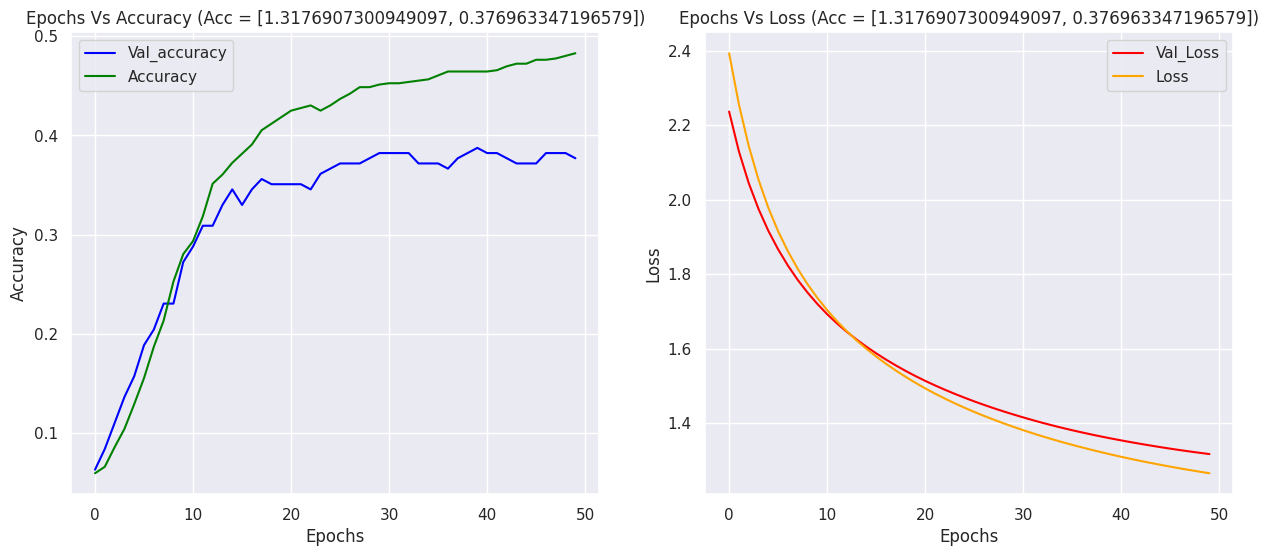

ploting for 4 layers with no of neuron 10


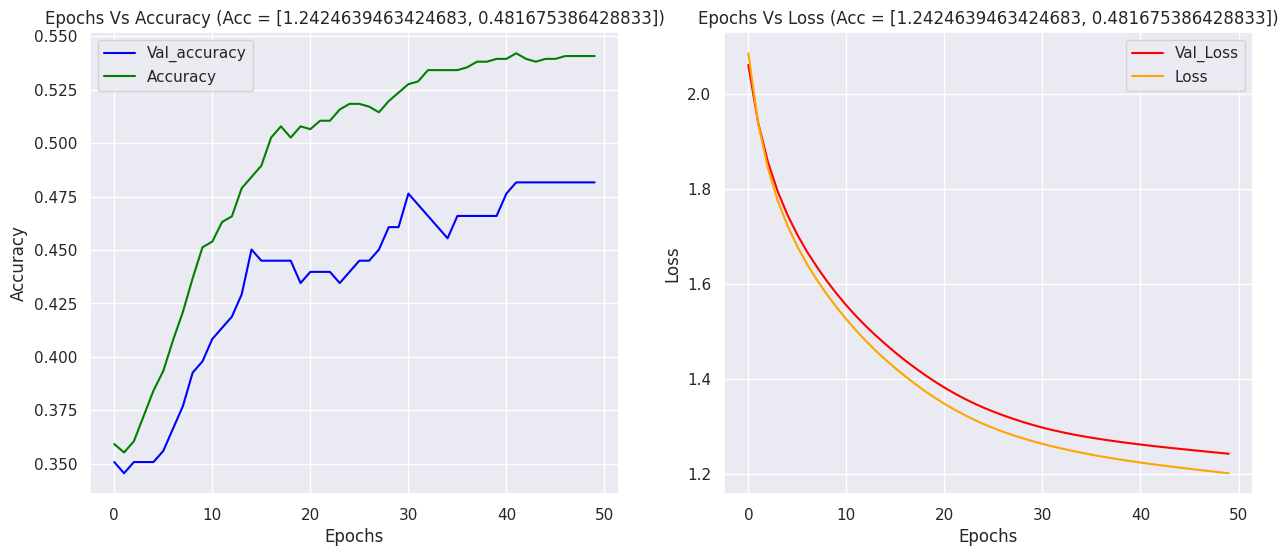

ploting for 6 layers with no of neuron 10


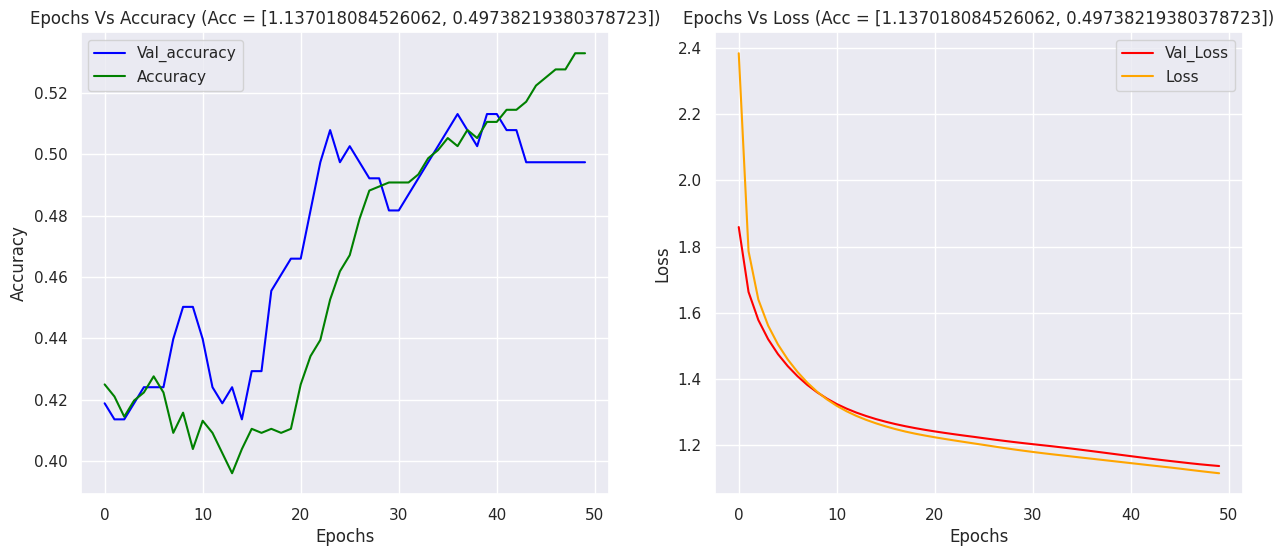

ploting for 8 layers with no of neuron 10


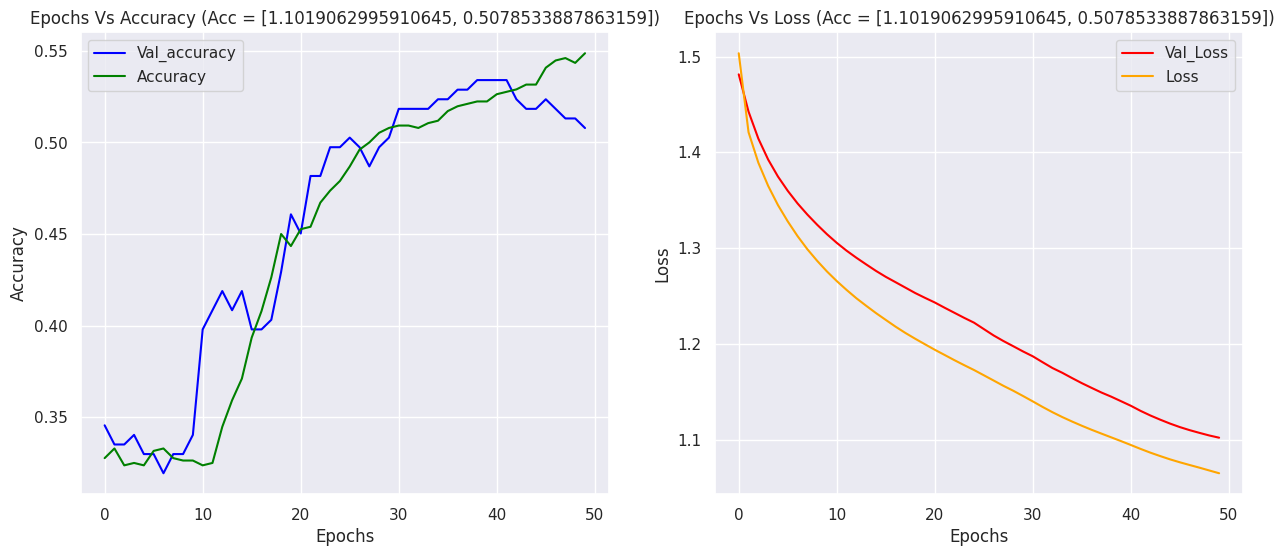

In [45]:
# Now plot all models at once
for history, model, layers in histories:
    print(f"ploting for {layers} layers with no of neuron 10")
    plot_model_accuracy(history, model)

### Observations:
- Highest accuracy is with 8 layers around 50%
-  The accurcay curve is not smooth so much of variation
- From plot we can see the curves are not smooth and it has lots of up and downs .There are some cases of overfitting as well.

### Model-2 With DropOut

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/120
6/6 - 1s - 219ms/step - accuracy: 0.1566 - loss: 2.1229 - val_accuracy: 0.1414 - val_loss: 2.0612
Epoch 2/120
6/6 - 0s - 55ms/step - accuracy: 0.1539 - loss: 2.1337 - val_accuracy: 0.1466 - val_loss: 2.0387
Epoch 3/120
6/6 - 0s - 45ms/step - accuracy: 0.1592 - loss: 2.0402 - val_accuracy: 0.1518 - val_loss: 2.0165
Epoch 4/120
6/6 - 0s - 59ms/step - accuracy: 0.1461 - loss: 2.0518 - val_accuracy: 0.1571 - val_loss: 1.9954
Epoch 5/120
6/6 - 0s - 41ms/step - accuracy: 0.1579 - loss: 2.0558 - val_accuracy: 0.1623 - val_loss: 1.9759
Epoch 6/120
6/6 - 0s - 48ms/step - accuracy: 0.1711 - loss: 2.0091 - val_accuracy: 0.1675 - val_loss: 1.9573
Epoch 7/120
6/6 - 0s - 24ms/step - accuracy: 0.1750 - loss: 2.0125 - val_accuracy: 0.1728 - val_loss: 1.9390
Epoch 8/120
6/6 - 0s - 32ms/step - accuracy: 0.1566 - loss: 2.0192 - val_accuracy: 0.1728 - val_loss: 1.9216
Epoch 9/120
6/6 - 0s - 30ms/step - accuracy: 0.1750 - loss: 1.9867 - val_accuracy: 0.1832 - val_loss: 1.9047
Epoch 10/120


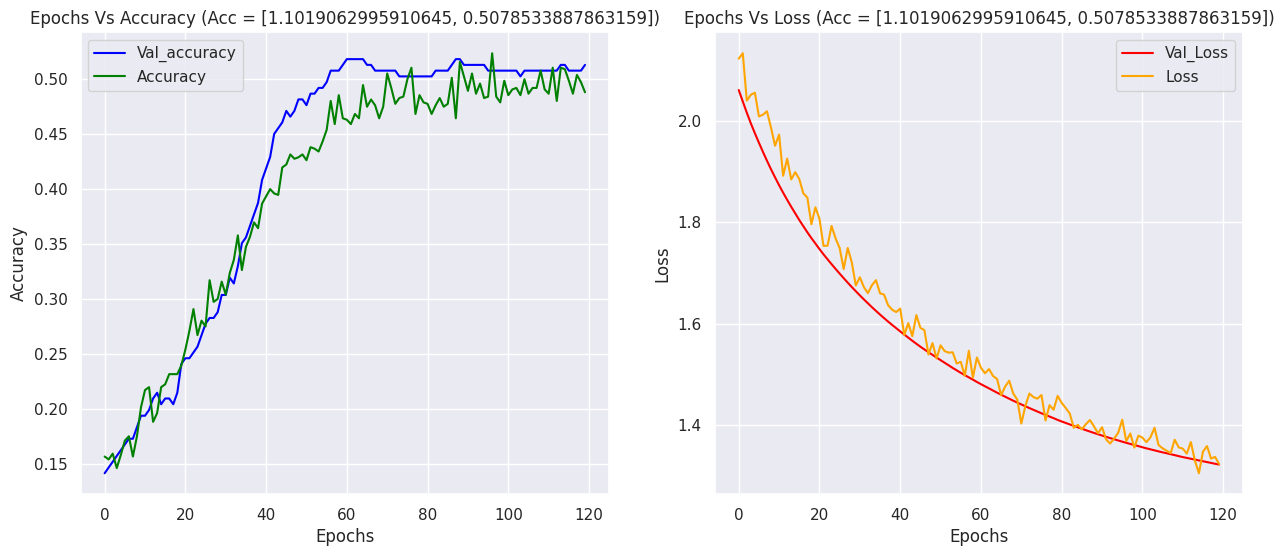

In [46]:
# Try SGD Optimizer  with 120 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model2 = Sequential()
model2.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation = 'softmax'))

compile_model(model2,optimizer_type='sgd')

print(model2.summary())

history = model2.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=120, batch_size=128, verbose=2)
model2.test_accuracy = model.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model2)

In [47]:
test_results = model2.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5668 - loss: 1.2282 
[1.2674282789230347, 0.5269607901573181]


### Observations:
- We can see the curve with training set is jumping up and down as we have introduced dropout
- Not much improvement with drop out .(.51)
- This is better then the basic model we had obsreved in Basic model.
- **Test accuracy is around .57**

##### Model 2.1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/120
6/6 - 2s - 276ms/step - accuracy: 0.1566 - loss: 2.1046 - val_accuracy: 0.1518 - val_loss: 2.0290
Epoch 2/120
6/6 - 0s - 68ms/step - accuracy: 0.1579 - loss: 2.0811 - val_accuracy: 0.1518 - val_loss: 1.9830
Epoch 3/120
6/6 - 0s - 17ms/step - accuracy: 0.1684 - loss: 1.9595 - val_accuracy: 0.1675 - val_loss: 1.9413
Epoch 4/120
6/6 - 0s - 18ms/step - accuracy: 0.1658 - loss: 1.9545 - val_accuracy: 0.1728 - val_loss: 1.9031
Epoch 5/120
6/6 - 0s - 22ms/step - accuracy: 0.1868 - loss: 1.9323 - val_accuracy: 0.1832 - val_loss: 1.8685
Epoch 6/120
6/6 - 0s - 18ms/step - accuracy: 0.2039 - loss: 1.8735 - val_accuracy: 0.1937 - val_loss: 1.8370
Epoch 7/120
6/6 - 0s - 23ms/step - accuracy: 0.2184 - loss: 1.8529 - val_accuracy: 0.2199 - val_loss: 1.8074
Epoch 8/120
6/6 - 0s - 24ms/step - accuracy: 0.2303 - loss: 1.8412 - val_accuracy: 0.2147 - val_loss: 1.7799
Epoch 9/120
6/6 - 0s - 23ms/step - accuracy: 0.2539 - loss: 1.7976 - val_accuracy: 0.2408 - val_loss: 1.7545
Epoch 10/120


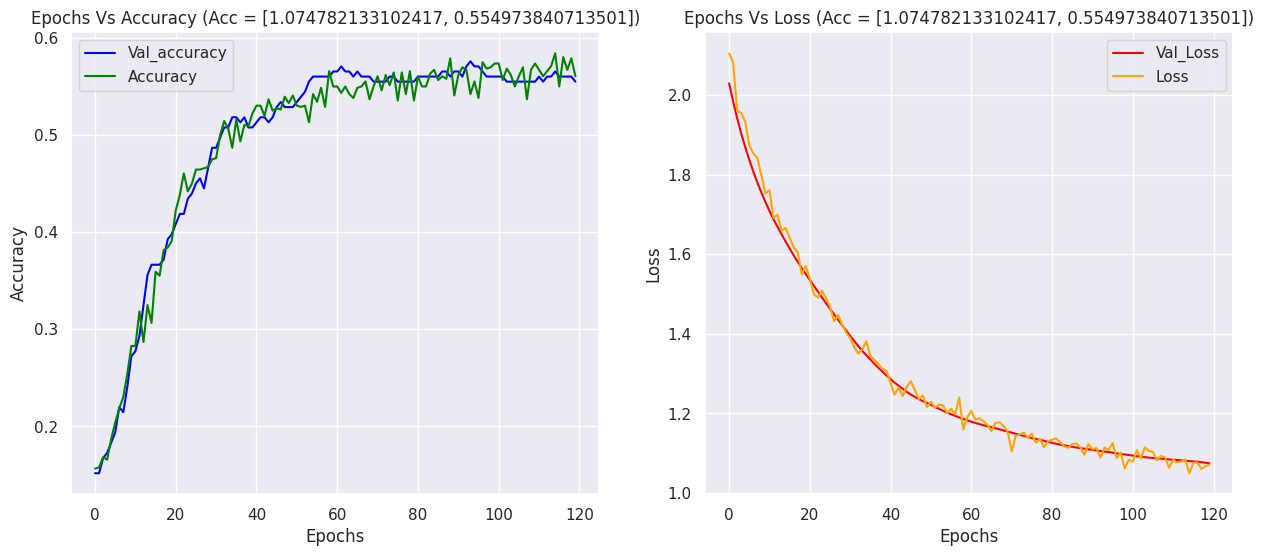

In [48]:
# Try adam Optimizer instead with 120 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam= Sequential()
model_adam.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(6, activation = 'softmax'))

compile_model(model_adam,optimizer_type='adam')

print(model_adam.summary())

history = model_adam.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=120, batch_size=128, verbose=2)
model_adam.test_accuracy = model_adam.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_adam)

In [49]:
test_results = model_adam.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6007 - loss: 0.9760 
[1.0186920166015625, 0.5759803652763367]


### Obsevations:
- Both loss and accurcay graph does not show any sign of overfitting.
- With adam the accuracy is bit better around 55% (highest Till Now)
- There is some fluctuation, especially in the accuracy and loss curves
- Accuracy is increasing, and loss is decreasing as expected.
- **Accurcay with Test or unseen data is around 57**%

#### Model 2.2

### Drop out with 350 epoch and higher batch size of 180

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/350
5/5 - 2s - 439ms/step - accuracy: 0.1434 - loss: 2.1180 - val_accuracy: 0.1518 - val_loss: 2.0353
Epoch 2/350
5/5 - 0s - 25ms/step - accuracy: 0.1368 - loss: 2.1286 - val_accuracy: 0.1518 - val_loss: 1.9961
Epoch 3/350
5/5 - 0s - 22ms/step - accuracy: 0.1592 - loss: 2.0620 - val_accuracy: 0.1623 - val_loss: 1.9593
Epoch 4/350
5/5 - 0s - 28ms/step - accuracy: 0.1737 - loss: 1.9889 - val_accuracy: 0.1675 - val_loss: 1.9251
Epoch 5/350
5/5 - 0s - 21ms/step - accuracy: 0.1789 - loss: 1.9582 - val_accuracy: 0.1728 - val_loss: 1.8946
Epoch 6/350
5/5 - 0s - 21ms/step - accuracy: 0.1645 - loss: 1.9527 - val_accuracy: 0.1937 - val_loss: 1.8662
Epoch 7/350
5/5 - 0s - 27ms/step - accuracy: 0.1987 - loss: 1.8905 - val_accuracy: 0.1990 - val_loss: 1.8395
Epoch 8/350
5/5 - 0s - 28ms/step - accuracy: 0.1987 - loss: 1.8633 - val_accuracy: 0.1990 - val_loss: 1.8145
Epoch 9/350
5/5 - 0s - 28ms/step - accuracy: 0.2263 - loss: 1.8110 - val_accuracy: 0.2094 - val_loss: 1.7909
Epoch 10/350


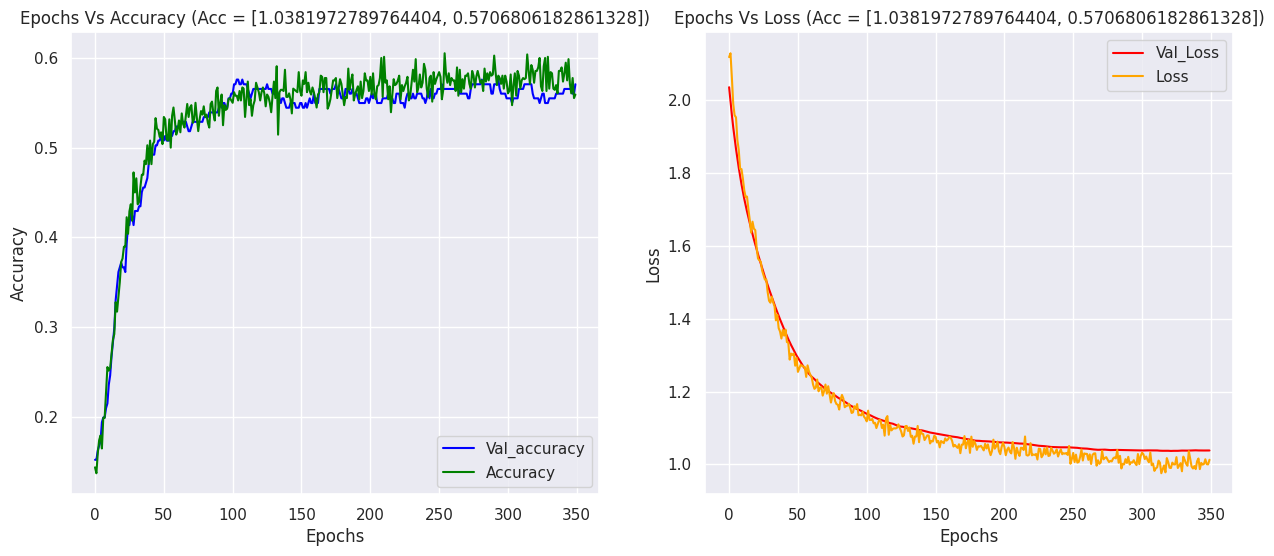

In [50]:
# Try adam Optimizer instead with 350 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam2= Sequential()
model_adam2.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam2.add(Dropout(0.2))
model_adam2.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam2.add(Dropout(0.2))
model_adam2.add(Dense(6, activation = 'softmax'))

compile_model(model_adam2,optimizer_type='adam')

print(model_adam2.summary())

history = model_adam2.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=350, batch_size=180, verbose=2)
model_adam2.test_accuracy = model_adam2.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_adam2)

In [51]:
test_results = model_adam2.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6475 - loss: 0.9350 
[0.9668253064155579, 0.6151960492134094]


### Observation:
- Both plot are converging pretty well.
- Training and validation accuracy curves follow a similar trend.
- No significant gap between them, suggesting minimal overfitting.
- Accuracy stabilizes around 0.57, indicating room for improvement.

**Loss Plot:**
- Both training and validation loss decrease steadily.
- No sudden spikes, which means training is stable.
- Validation loss is not diverging, indicating no severe overfitting.
- Slight increase in accurcay by 2 % (57%)
---
- **Test data(Unseen Data) accuracy is around 61%(Best Till now)**

### Infernce with respect Model 2.1
- Compare to Model 2.1 with 120 epoch this is a better model in terms of test score .Even the convergnace with training seems to better.
- We can see the loss curve has less flactuation compared Model 2.1
- There is some fluctuation, especially in the accuracy .


### Model 3 Batch normalization

##### Model 3.1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336 (1.31 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 36 (144.00 B)

None
Epoch 1/200
5/5 - 2s - 329ms/step - accuracy: 0.1447 - loss: 2.2634 - val_accuracy: 0.0471 - val_loss: 2.8753
Epoch 2/200
5/5 - 0s - 21ms/step - accuracy: 0.1474 - loss: 2.2503 - val_accuracy: 0.0524 - val_loss: 2.8200
Epoch 3/200
5/5 - 0s - 27ms/step - accuracy: 0.1526 - loss: 2.2348 - val_accuracy: 0.0576 - val_loss: 2.7675
Epoch 4/200
5/5 - 0s - 25ms/step - accuracy: 0.1566 - loss: 2.2192 - val_accuracy: 0.0628 - val_loss: 2.7182
Epoch 5/200
5/5 - 0s - 26ms/step - accuracy: 0.1592 - loss: 2.2038 - val_accuracy: 0.0785 - val_loss: 2.6718
Epoch 6/200
5/5 - 0s - 28ms/step - accuracy: 0.1632 - loss: 2.1887 - val_accuracy: 0.0995 - val_loss: 2.6283
Epoch 7/200
5/5 - 0s - 24ms/step - accuracy: 0.1645 - loss: 2.1739 - val_accuracy: 0.1047 - val_loss: 2.5872
Epoch 8/200
5/5 - 0s - 25ms/step - accuracy: 0.1697 - loss: 2.1593 - val_accuracy: 0.1099 - val_loss: 2.5482
Epoch 9/200
5/5 - 0s - 21ms/step - accuracy: 0.1750 - loss: 2.1449 - val_accuracy: 0.1099 - val_loss: 2.5114
Epoch 10/200


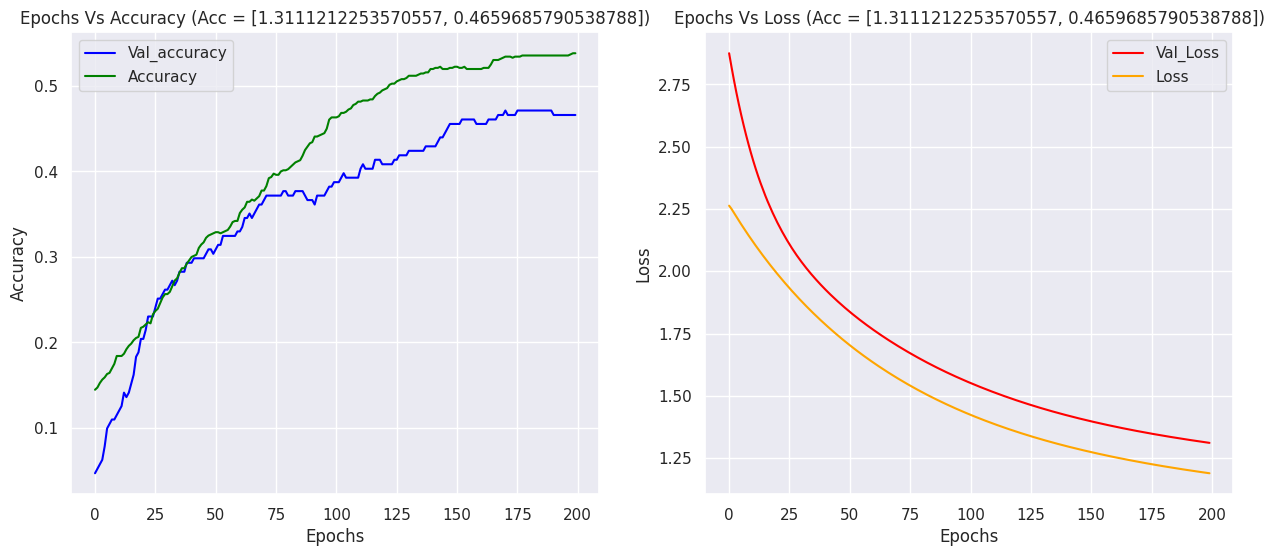

In [52]:
# Batch Normalization along  with the 200 epoch and  drop out best batch_size values

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
random.seed(42)
tf.random.set_seed(42)

model_batch_norm = Sequential()
model_batch_norm.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(6, activation = 'softmax'))

compile_model(model_batch_norm,'sgd')

print(model_batch_norm.summary())
history = model_batch_norm.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=200, batch_size=180, verbose=2)
model_batch_norm.test_accuracy = model_batch_norm.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_batch_norm)

### Observation:
- **Accuracy Plot Green Line (Training Accuracy):**
- Gradually increases and plateaus near 55%.
- Suggests the model is learning patterns from training data.
- **Blue Line (Validation Accuracy)** Follows training accuracy initially.
Stalls around 47% after 100+ epochs → Possible overfitting.
The gap between training and validation accuracy is increasing, suggesting the model is memorizing rather than generalizing.
- Loss graph is smooth but the the validarion loss seems to be wider as we went down so possible overfiiting


##### Model 3.2

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336 (1.31 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 36 (144.00 B)

None
Epoch 1/200
5/5 - 2s - 500ms/step - accuracy: 0.1500 - loss: 2.2526 - val_accuracy: 0.0471 - val_loss: 2.8327
Epoch 2/200
5/5 - 0s - 21ms/step - accuracy: 0.1605 - loss: 2.2090 - val_accuracy: 0.0524 - val_loss: 2.7469
Epoch 3/200
5/5 - 0s - 36ms/step - accuracy: 0.1684 - loss: 2.1683 - val_accuracy: 0.0576 - val_loss: 2.6667
Epoch 4/200
5/5 - 0s - 22ms/step - accuracy: 0.1763 - loss: 2.1293 - val_accuracy: 0.0733 - val_loss: 2.5911
Epoch 5/200
5/5 - 0s - 22ms/step - accuracy: 0.1855 - loss: 2.0916 - val_accuracy: 0.0942 - val_loss: 2.5207
Epoch 6/200
5/5 - 0s - 36ms/step - accuracy: 0.1987 - loss: 2.0554 - val_accuracy: 0.1047 - val_loss: 2.4557
Epoch 7/200
5/5 - 0s - 61ms/step - accuracy: 0.2118 - loss: 2.0208 - val_accuracy: 0.1099 - val_loss: 2.3955
Epoch 8/200
5/5 - 0s - 56ms/step - accuracy: 0.2289 - loss: 1.9877 - val_accuracy: 0.1152 - val_loss: 2.3397
Epoch 9/200
5/5 - 0s - 52ms/step - accuracy: 0.2329 - loss: 1.9560 - val_accuracy: 0.1204 - val_loss: 2.2880
Epoch 10/200


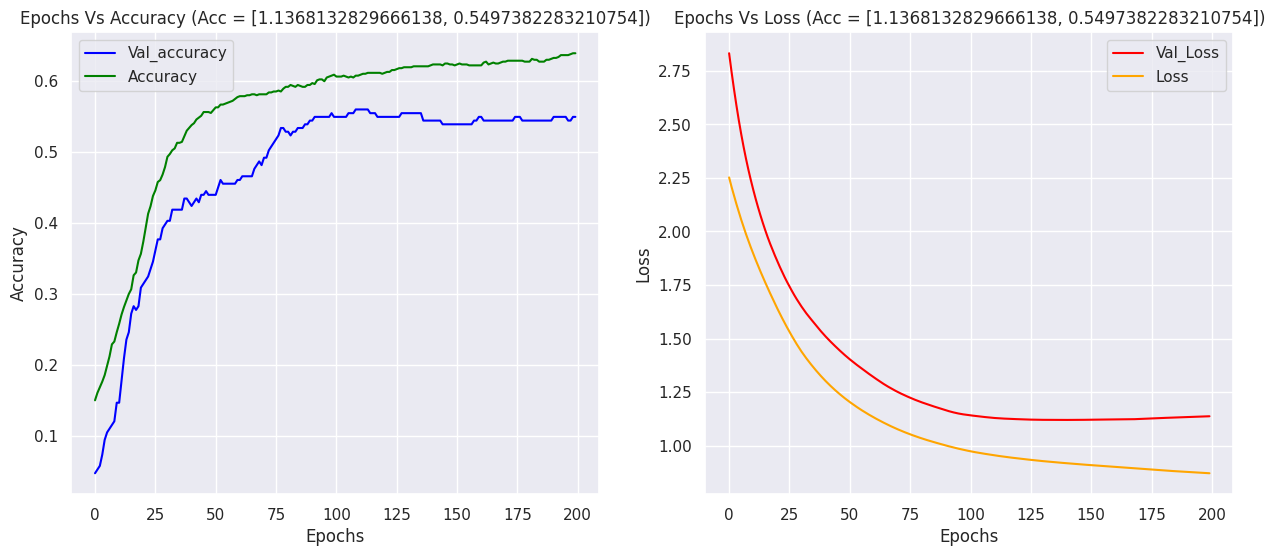

In [53]:
# Batch Normalization along  with the 200 epoch and  drop out best batch_size values

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
random.seed(42)
tf.random.set_seed(42)

model_batch_norm = Sequential()
model_batch_norm.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(6, activation = 'softmax'))

compile_model(model_batch_norm,'adam')

print(model_batch_norm.summary())
history = model_batch_norm.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=200, batch_size=180, verbose=2)
model_batch_norm.test_accuracy = model_batch_norm.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_batch_norm)

### Observations:
There is slight Improvement with adam but not much difference as we see clear diverging in loss graph and there is clear sign of overfitting.

- **Accuracy Plot Green Line (Training Accuracy):**
- Gradually increases and plateaus near 55%.
- Suggests the model is learning patterns from training data.
- **Blue Line (Validation Accuracy)** Follows training accuracy initially.
Stalls around 47% after 100+ epochs → Possible overfitting.
The gap between training and validation accuracy is increasing, suggesting the model is memorizing rather than generalizing.
- Loss graph is smooth but the the validarion loss seems to be wider as we went down so possible overfiiting


### Model 2.2 vs Model 3
- Model 2.2 is best model till now with 61% test accuracy and convergence.
- Model 3 has high devergence compared to Model 2.2 we can see both loss and accuracy is diverging and it seems Model 3 is overfitting and trying to learn the dataset

### Model 4 Funnel Design (Reduce the no of neurons as we go)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324 (1.27 KB)

 Trainable params: 324 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
5/5 - 2s - 350ms/step - accuracy: 0.0197 - loss: 2.0504 - val_accuracy: 0.0366 - val_loss: 2.0098
Epoch 2/200
5/5 - 0s - 77ms/step - accuracy: 0.0289 - loss: 2.0045 - val_accuracy: 0.0628 - val_loss: 1.9751
Epoch 3/200
5/5 - 0s - 20ms/step - accuracy: 0.0395 - loss: 1.9639 - val_accuracy: 0.0890 - val_loss: 1.9446
Epoch 4/200
5/5 - 0s - 20ms/step - accuracy: 0.0789 - loss: 1.9277 - val_accuracy: 0.1309 - val_loss: 1.9181
Epoch 5/200
5/5 - 0s - 20ms/step - accuracy: 0.1316 - loss: 1.8956 - val_accuracy: 0.1990 - val_loss: 1.8948
Epoch 6/200
5/5 - 0s - 29ms/step - accuracy: 0.1737 - loss: 1.8669 - val_accuracy: 0.2304 - val_loss: 1.8738
Epoch 7/200
5/5 - 0s - 29ms/step - accuracy: 0.2118 - loss: 1.8414 - val_accuracy: 0.2461 - val_loss: 1.8553
Epoch 8/200
5/5 - 0s - 24ms/step - accuracy: 0.2395 - loss: 1.8186 - val_accuracy: 0.2670 - val_loss: 1.8386
Epoch 9/200
5/5 - 0s - 21ms/step - accuracy: 0.2711 - loss: 1.7978 - val_accuracy: 0.2827 - val_loss: 1.8232
Epoch 10/200


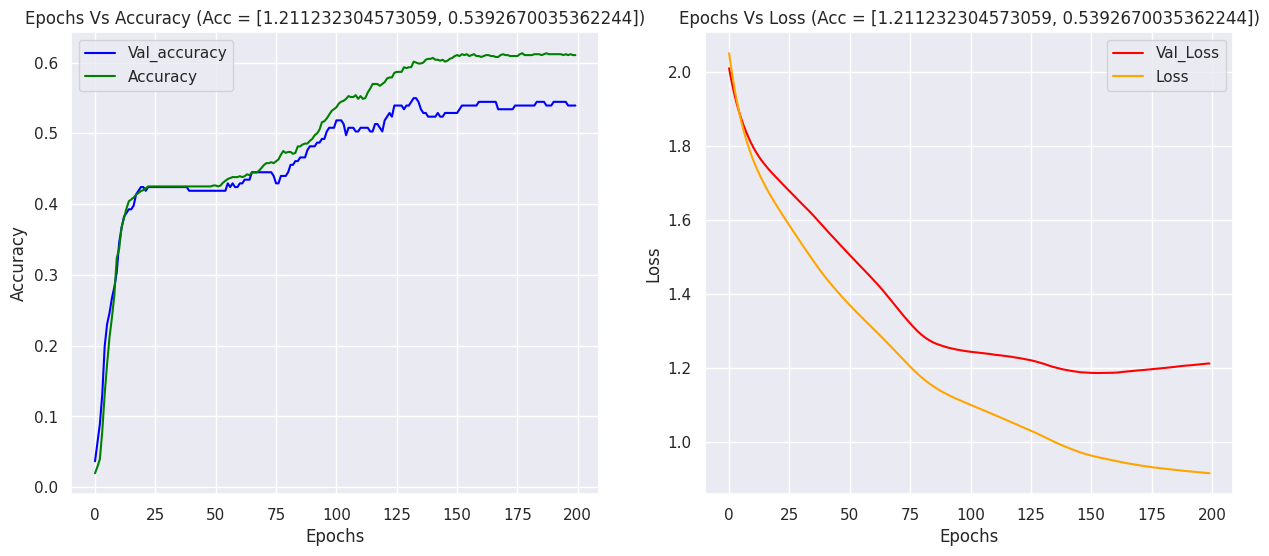

In [54]:
# Changing/increasing the 'epoch' and 'batch_size' values in the 2-Layer Funnel Architecture with 10 & 6 Neurons in each improves the model performance
# without drop out introduced
# Stochastic Gradient Optimizer

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime

random.seed(42)
tf.random.set_seed(42)

# Define funnel model starting with 11 neurons (input features)
funnel_model = Sequential([
    Dense(11, activation='relu', input_shape=(11,)),  # Input layer (equal to feature count)
    Dense(8, activation='relu'),   # Reduced neurons
    Dense(6, activation='relu'),   # Further reduction
    Dense(6, activation='softmax')  # Output layer for 6 classes
])

compile_model(funnel_model)
print(funnel_model.summary())

history = funnel_model.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=200, batch_size=180, verbose=2)
funnel_model.test_accuracy = funnel_model.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, funnel_model)

### Observations:
-  We can see both accuracy and losses are deverging after initial steadiness .
- Training acuracy is higher around .61 but lower in validation .53. Similar chart we can see for loss as well (validation loss at 1.21 where as training loss is around .91)
- It seems like the model is trying to learn specific to dataset not in general.

### Model 5 ( With checkpoint and Early Stopping)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/350
5/5 - 2s - 406ms/step - accuracy: 0.1434 - loss: 2.1180 - val_accuracy: 0.1518 - val_loss: 2.0353
Epoch 2/350
5/5 - 0s - 93ms/step - accuracy: 0.1368 - loss: 2.1286 - val_accuracy: 0.1518 - val_loss: 1.9961
Epoch 3/350
5/5 - 0s - 44ms/step - accuracy: 0.1592 - loss: 2.0620 - val_accuracy: 0.1623 - val_loss: 1.9593
Epoch 4/350
5/5 - 0s - 60ms/step - accuracy: 0.1737 - loss: 1.9889 - val_accuracy: 0.1675 - val_loss: 1.9251
Epoch 5/350
5/5 - 0s - 42ms/step - accuracy: 0.1789 - loss: 1.9582 - val_accuracy: 0.1728 - val_loss: 1.8946
Epoch 6/350
5/5 - 0s - 36ms/step - accuracy: 0.1645 - loss: 1.9527 - val_accuracy: 0.1937 - val_loss: 1.8662
Epoch 7/350
5/5 - 0s - 45ms/step - accuracy: 0.1987 - loss: 1.8905 - val_accuracy: 0.1990 - val_loss: 1.8395
Epoch 8/350
5/5 - 0s - 48ms/step - accuracy: 0.1987 - loss: 1.8633 - val_accuracy: 0.1990 - val_loss: 1.8145
Epoch 9/350
5/5 - 0s - 45ms/step - accuracy: 0.2263 - loss: 1.8110 - val_accuracy: 0.2094 - val_loss: 1.7909
Epoch 10/350


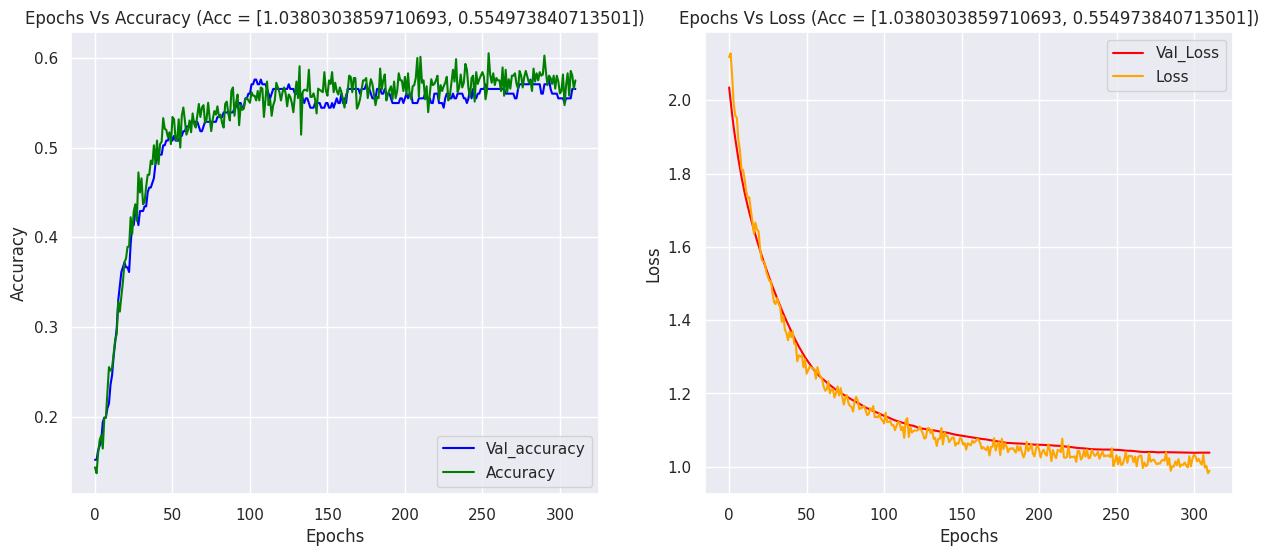

In [55]:
backend.clear_session()

# Fixing the seed for reproducibility
random.seed(42)
tf.random.set_seed(42)

# Define model
model_adam_with_es = Sequential([
    Dense(11, activation='relu', input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(8, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

# Compile the model (assuming you have a function compile_model)
compile_model(model_adam_with_es, optimizer_type='adam')

# Print model summary
print(model_adam_with_es.summary())

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model_adam_with_es.fit(
    X_train_scaled, yv_train,
    validation_data=(X_test_scaled, y_val),
    epochs=350,
    batch_size=180,
    verbose=2,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the best model
model_adam_with_es.test_accuracy = model_adam_with_es.evaluate(X_test_scaled, y_val, verbose=1)

# Plot accuracy and loss
plot_model_accuracy(history, model_adam_with_es)

In [56]:
test_results = model_adam_with_es.evaluate(X_test_scaled_actual, y_test, verbose=1)
print(test_results)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6361 - loss: 0.9391 
[0.9728140234947205, 0.6053921580314636]


### Observations:
- We can see both loss and accuracy are converging well for training and validation
- The Test accuracy is around .60 which is almost similar to Model 2.2
- Earlystopping can help to avoid overfitting

### Model 2.2 vs Model 5
- Both are almost same model and plot looks mirrior image of each other
- Only difference we have used eraly stopping to avoid overfitting so in plot of accuracy we can see that miniute difference in the accuracy plot.

### Model 6

#### Taking the whole dataset as we have less records in signal dataset i.e around 1300 .So may be we need a bigger sample .
-  We will do validation on y-test instaed of having seperate sample to learn .

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/350
8/8 - 2s - 294ms/step - accuracy: 0.1462 - loss: 2.1149 - val_accuracy: 0.1176 - val_loss: 1.9236
Epoch 2/350
8/8 - 0s - 38ms/step - accuracy: 0.1588 - loss: 2.0703 - val_accuracy: 0.1201 - val_loss: 1.8694
Epoch 3/350
8/8 - 0s - 17ms/step - accuracy: 0.1483 - loss: 1.9999 - val_accuracy: 0.1373 - val_loss: 1.8217
Epoch 4/350
8/8 - 0s - 19ms/step - accuracy: 0.1945 - loss: 1.9476 - val_accuracy: 0.1667 - val_loss: 1.7806
Epoch 5/350
8/8 - 0s - 14ms/step - accuracy: 0.2387 - loss: 1.8992 - val_accuracy: 0.1814 - val_loss: 1.7438
Epoch 6/350
8/8 - 0s - 14ms/step - accuracy: 0.2187 - loss: 1.8592 - val_accuracy: 0.2255 - val_loss: 1.7109
Epoch 7/350
8/8 - 0s - 17ms/step - accuracy: 0.2429 - loss: 1.7896 - val_accuracy: 0.2623 - val_loss: 1.6812
Epoch 8/350
8/8 - 0s - 14ms/step - accuracy: 0.2545 - loss: 1.7827 - val_accuracy: 0.2843 - val_loss: 1.6543
Epoch 9/350
8/8 - 0s - 14ms/step - accuracy: 0.2913 - loss: 1.7226 - val_accuracy: 0.2990 - val_loss: 1.6287
Epoch 10/350


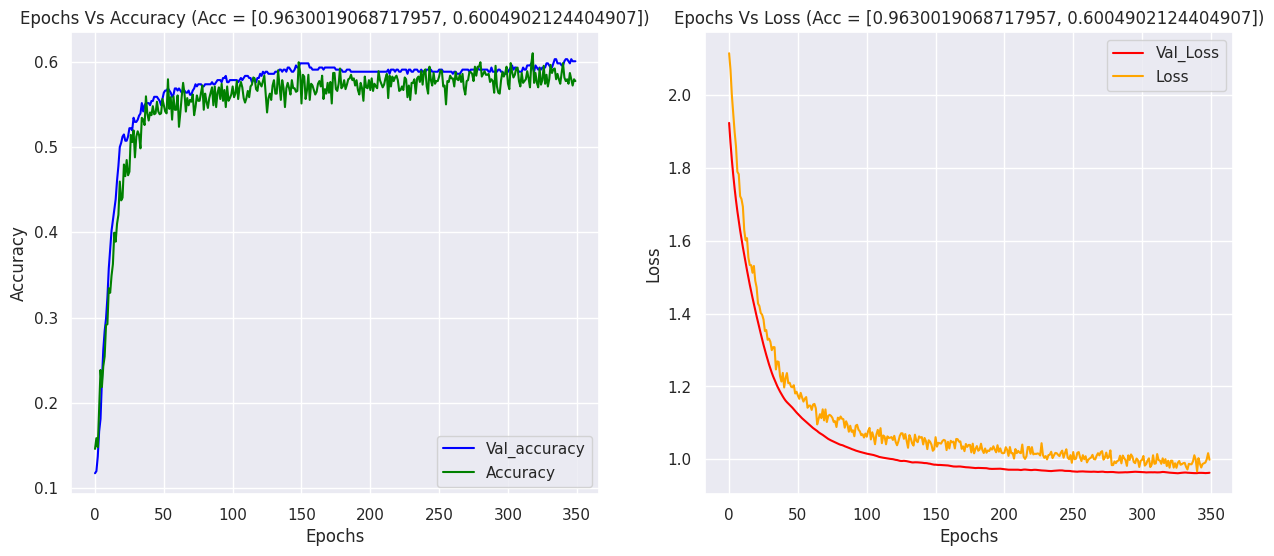

In [57]:
backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam_all= Sequential()
model_adam_all.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam_all.add(Dropout(0.2))
model_adam_all.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam_all.add(Dropout(0.2))
model_adam_all.add(Dense(6, activation = 'softmax'))

compile_model(model_adam_all,optimizer_type='adam')

print(model_adam_all.summary())

history = model_adam_all.fit(X_train_scaled_actual, y_train, validation_data= [X_test_scaled_actual, y_test], epochs=350, batch_size=128, verbose=2)
model_adam_all.test_accuracy = model_adam_all.evaluate(X_test_scaled_actual, y_test, verbose = 1)
plot_model_accuracy(history, model_adam_all)

### Observation:
- Here we tried the training with 70% sample and test data is used as validation set .We could able to achieve 60% accuracy
-  There are some up and downs and curve is not smooth may be due to drop out .
- This might be better in terms of validatiin score if we compare with Model 2.2 Drop out witrh 350 epoch but then we donot have unseen data as we have used everything .

### Model Optimzation Random Search CV

In [82]:
keras_estimator = KerasClassifier(
    build_fn=create_model_v4,
    lr=0.01,
    batch_size=32,
    units_1=16,
    units_2=6,
    activation="relu",
    dropout_rate=0.2,
    optimizer="adam",
    num_layers=2,
    verbose=1
)# define the grid search parameters
param_random = {
    'batch_size':[16,32, 64, 128],
    "lr":[0.01,0.1,0.001],
    "units_1": [8, 16, 32, 64],
    "units_2": [4, 6, 12, 24],
    "activation": ["relu", "tanh", "swish", "leaky_relu"],
    "dropout_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
    "optimizer": ["adam", "sgd", "rmsprop", "nadam"],
    "num_layers": [1, 2, 3, 4]
    }

kfold_splits = 3
random_search= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    n_iter=10,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [83]:
random_result = random_search.fit(X_train_scaled_actual, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3529 - loss: 1.6630 - val_accuracy: 0.5131 - val_loss: 1.1129
Best: 0.545741 using {'units_2': 12, 'units_1': 32, 'optimizer': 'adam', 'num_layers': 2, 'lr': 0.1, 'dropout_rate': 0.2, 'batch_size': 128, 'activation': 'tanh'}


In [85]:
random_result.best_params_

{'units_2': 12,
 'units_1': 32,
 'optimizer': 'adam',
 'num_layers': 2,
 'lr': 0.1,
 'dropout_rate': 0.2,
 'batch_size': 128,
 'activation': 'tanh'}

Best Hyperparameters: {'units_2': 12, 'units_1': 32, 'optimizer': 'adam', 'num_layers': 2, 'lr': 0.1, 'dropout_rate': 0.2, 'batch_size': 128, 'activation': 'tanh'}
Epoch 1/350
8/8 - 2s - 263ms/step - accuracy: 0.4679 - loss: 1.4248 - val_accuracy: 0.5858 - val_loss: 1.0125
Epoch 2/350
8/8 - 0s - 53ms/step - accuracy: 0.5152 - loss: 1.0926 - val_accuracy: 0.5735 - val_loss: 0.9865
Epoch 3/350
8/8 - 0s - 14ms/step - accuracy: 0.5478 - loss: 1.0429 - val_accuracy: 0.5833 - val_loss: 0.9416
Epoch 4/350
8/8 - 0s - 15ms/step - accuracy: 0.5615 - loss: 1.0073 - val_accuracy: 0.6275 - val_loss: 0.9456
Epoch 5/350
8/8 - 0s - 20ms/step - accuracy: 0.5731 - loss: 0.9929 - val_accuracy: 0.5858 - val_loss: 0.9360
Epoch 6/350
8/8 - 0s - 14ms/step - accuracy: 0.5794 - loss: 0.9708 - val_accuracy: 0.6176 - val_loss: 0.9545
Epoch 7/350
8/8 - 0s - 14ms/step - accuracy: 0.5783 - loss: 0.9681 - val_accuracy: 0.6078 - val_loss: 0.9371
Epoch 8/350
8/8 - 0s - 16ms/step - accuracy: 0.5752 - loss: 1.0008 - val

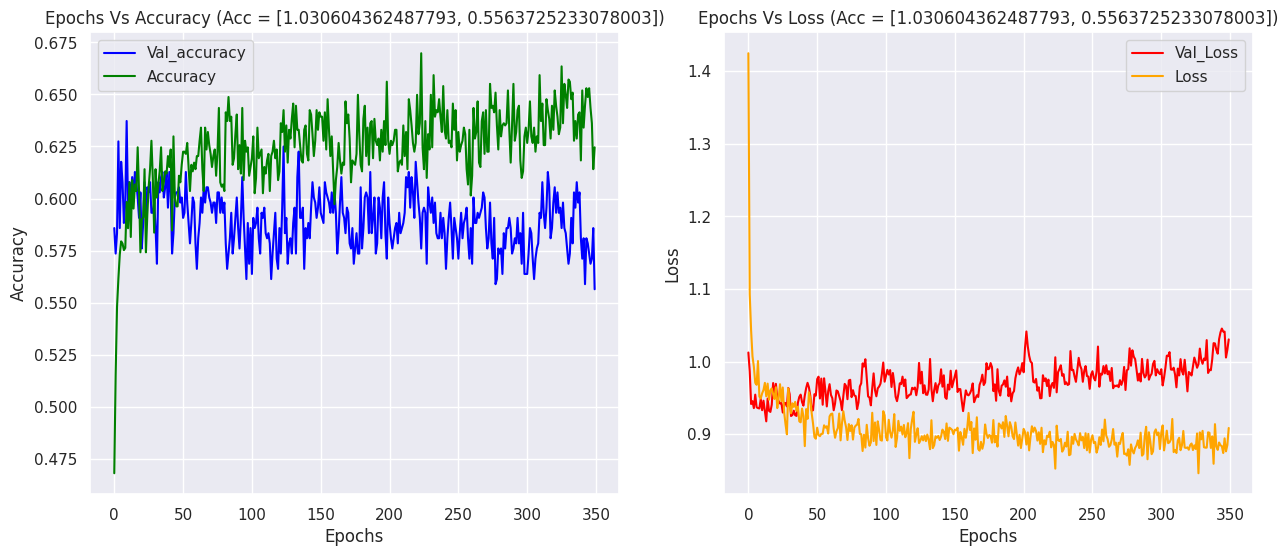

In [86]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a final model using the best parameters
final_model = create_model_v4(
    lr=best_params["lr"],
    units_1=best_params["units_1"],
    units_2=best_params["units_2"],
    activation=best_params["activation"],
    dropout_rate=best_params["dropout_rate"],
    optimizer=best_params["optimizer"],
    num_layers=best_params["num_layers"]
)
# Train the final model on the entire dataset
history = final_model.fit(X_train_scaled_actual, y_train, validation_data= [X_test_scaled_actual, y_test], epochs=350, batch_size=128, verbose=2)
final_model.test_accuracy = final_model.evaluate(X_test_scaled_actual, y_test, verbose = 1)
plot_model_accuracy(history, final_model)




### Observations:
 - No improvement with Ramdom search CV as accuracy is quite less
 - There is no convergence and even the plots are not smooth and full of noise.
 - There is some hint of overfitting as well.
 - Both the plot show high divergence

**Models 2.2,5 and 6 were found to be the best performing models with good  convergence with training & validation Loss & Accuracy curves with their respective highest found Validation Accuracies as 58% Test score as 60.29, Validation score 56 % and Test score 60.59, Validation score 60.04 %** .

**Part B**

- Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides.

**Dataset:**
- SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

- Build a digit Classifier on SVHN (Street View Housing number)

### Import additional lib required for part B

In [87]:
import h5py


## Read h5 file

Part B - Q1 A - Read the .h5 file and assign to a variable.


In [140]:
svhn = h5py.File(f'{path}//Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')


Part B - Q1 B - Print all the keys from the .h5 file.

In [142]:
for i in svhn.keys():
  print(i)

X_test
X_train
X_val
y_test
y_train
y_val


#### Observation:
We have 6 keys in Autonomous_Vehicles_SVHN_single_grey1.h5 file .
**X_test,X_train,X_val,y_test,y_train,y_val**


Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test


In [143]:
# Read data into variables:
X_svhn_train = svhn['X_train'][:]
y_svhn_train = svhn['y_train'][:]
X_svhn_test = svhn['X_test'][:]
y_svhn_test = svhn['y_test'][:]
X_svhn_val = svhn['X_val'][:]
y_svhn_val = svhn['y_val'][:]
# Closing the file:
svhn.close()

## Print training validation and test set

Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.


In [144]:
print(f"Training Sample--> {X_svhn_train.shape}")
print(f"y_train.shape--> {y_svhn_train.shape}")
print(f"Testing Sample--> {X_svhn_test.shape}")
print(f"y_test.shape--> {y_svhn_test.shape}")
print(f"Validation Sample--> {X_svhn_val.shape}")
print(f"y_val.shape--> {y_svhn_val.shape}")

Training Sample--> (42000, 32, 32)
y_train.shape--> (42000,)
Testing Sample--> (18000, 32, 32)
y_test.shape--> (18000,)
Validation Sample--> (60000, 32, 32)
y_val.shape--> (60000,)


#### Observation:
- Train sample has 42000 sample
- Test sample has around 18000 sample
- Validation sample has 60000 smaple
- We can see both x and y are in same shape so in sync

In [127]:
print(f"Total Images {X_svhn_train.shape[0]+X_svhn_test.shape[0]+X_svhn_val.shape[0]}")

Total Images 120000


#### Observation:
We have around .12 million images

In [128]:
# Unique classes
set(y_svhn_train.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Observation:
There are 10 unique classes starting from 0 to 9

Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.


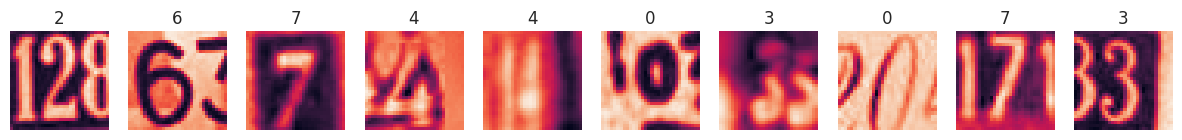

In [129]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))  # 1 row, 10 columns

for i in range(10):
    axes[i].imshow(X_svhn_train[i])  # Display each image
    axes[i].set_title(y_svhn_train[i])  # Set label as title
    axes[i].axis("off")  # Hide axes for better visualization
plt.show()

## Shaping the Variable For Neural Network Model

Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.


In [130]:
X_svhn_train = X_svhn_train.reshape(len(X_svhn_train), 32*32)
X_svhn_test = X_svhn_test.reshape(len(X_svhn_test), 32*32)
X_svhn_val = X_svhn_val.reshape(len(X_svhn_val), 32*32)


In [120]:
# Printing the shape of Training, Test and Validation Dataset:
print('Resized Training set feature shape = ', X_svhn_train.shape, y_svhn_train.shape)
print('Resized Test set feature shape = ', X_svhn_test.shape, y_svhn_test.shape)
print('Resized Validation set feature shape = ', X_svhn_val.shape, y_svhn_val.shape)

Resized Training set feature shape =  (42000, 1024) (42000,)
Resized Test set feature shape =  (18000, 1024) (18000,)
Resized Validation set feature shape =  (60000, 1024) (60000,)


#### Observations:
- We have created a 1D vector.
- After reshape we see same no of records or rows but we have

Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [131]:
X_svhn_train = X_svhn_train / 255
X_svhn_test = X_svhn_test / 255
X_svhn_val = X_svhn_val / 255

#### Observations:
we have normalised the value for neural networks by dividing by 255

Part B - Q2 E - Transform Labels into format acceptable by Neural Network

In [146]:
y_svhn_train = to_categorical(y_svhn_train)
y_svhn_test = to_categorical(y_svhn_test)
y_svhn_val = to_categorical(y_svhn_val)

In [150]:
print(f"Training firsr 5 values after apply catogoricak {y_svhn_train[0:5]}")
print(f"Testing firsr 5 values after apply catogoricak {y_svhn_test[0:5]}")
print(f"Validation firsr 5 values after apply catogoricak {y_svhn_val[0:5]}")

Training firsr 5 values after apply catogoricak [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Testing firsr 5 values after apply catogoricak [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Validation firsr 5 values after apply catogoricak [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Observations:
Transformed lables with to_catgorical so that we can use in neural network


Part B - Q2 F - Print total Number of classes in the Dataset.


In [157]:
y_svhn_train_transform=np.argmax(y_svhn_train,axis=1)
print(f"Unique Values{np.unique(y_svhn_train_transform)}")

Unique Values[0 1 2 3 4 5 6 7 8 9]


#### Observations:
We can see there are 10 classes ranging from 0 to 9

## Model Building

###Model 1

In [136]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(1024,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_svhn_train, y_svhn_train, epochs=50)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1110 - loss: 2.3609
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1327 - loss: 2.3280
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1460 - loss: 2.3185
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1547 - loss: 2.3132
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1597 - loss: 2.3097
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1633 - loss: 2.3072
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1661 - loss: 2.3051
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1679 - loss: 2.3034
Epoch 9/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1702 - loss: 2.3020
Epoch 10/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1713 - loss: 2.3007
Epoch 11/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1726 - loss: 2.2996
Epoch 12/50
1313/1313 ━━━━━━━━